In [5]:
# ============================================================================
# DATA VISUALIZATION: Foreign Accent Reduction META-ANALYSIS
# ============================================================================
# PURPOSE: Generate publication-quality figures for meta-analytic results
#          including effect size distributions, moderator analyses, and
#          diagnostic plots for publication bias and robustness checks
#
# WORKFLOW:
#   STEP 0: Environment setup & directory initialization
#   STEP 1: Effect size distribution & forest plot (Figure 1)
#   STEP 2: Univariate moderator forest plots (Figure 2)
#   STEP 3: Multivariate meta-regression visualizations (Figure 3)
#   STEP 4: Publication bias & robustness diagnostics (Figure 4)
#
# DEPENDENCIES:
#   pandas ≥ 1.3.0          Data manipulation
#   numpy ≥ 1.21.0          Numerical operations
#   matplotlib ≥ 3.4.0      Publication-grade visualization
#   scipy ≥ 1.7.0           Statistical functions (KDE)
#
# ============================================================================
# DATA STRUCTURE
# ============================================================================
#
# INPUTS:
#   Meta_ready_cleaned.csv                              Individual effect sizes
#   Meta_Analysis_Results/Step1_Overall_Model/
#       └── overall_meta_analysis_results.csv           Pooled effect & heterogeneity
#   Meta_Analysis_Results/Step2_Moderator_Analysis/
#       ├── univariate_moderator_summary.csv            Omnibus tests
#       ├── univariate_moderator_results.csv            Level-specific estimates
#       └── multivariate_model_coefficients.csv         Adjusted moderator effects
#   Meta_Analysis_Results/Step3_Robustness_Checks/
#       └── leave_one_out_analysis.csv                  Sensitivity metrics
#   Meta_Analysis_Results/Step4_Publication_Bias/
#       └── publication_bias_tests.csv                  Egger test results
#
# OUTPUTS (8 files total, organized by visualization step):
#
# Data_Visualization/
# ├── Step1_Effect_Distribution/
# │   ├── Figure1_Effect_Size_Distribution.png        Distribution + forest plot
# │   └── Figure1_Effect_Size_Distribution.pdf
# ├── Step2_Moderator_Forest/
# │   ├── Figure2_Univariate_Moderators.png           Univariate moderator forest
# │   └── Figure2_Univariate_Moderators.pdf
# ├── Step3_Multivariate_Panels/
# │   ├── Figure3_Multivariate_Meta_Regression.png    4-panel moderator dashboard
# │   └── Figure3_Multivariate_Meta_Regression.pdf
# └── Step4_Diagnostics/
#     ├── Figure4_Publication_Bias_Robustness.png     Funnel + LOO plots
#     └── Figure4_Publication_Bias_Robustness.pdf
#
# ============================================================================

# ============================================================================
# STEP 0: ENVIRONMENT CONFIGURATION & LIBRARY INITIALIZATION
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib.patches import PathPatch, Circle
from matplotlib.path import Path
import matplotlib.patheffects as path_effects
from scipy.stats import gaussian_kde
import os

# ────────────────────────────────────────────────────────────────────────
# 0.1: Initialize Output Directory Infrastructure
# ────────────────────────────────────────────────────────────────────────

os.makedirs('Data_Visualization', exist_ok=True)
os.makedirs('Data_Visualization/Step1_Effect_Distribution', exist_ok=True)
os.makedirs('Data_Visualization/Step2_Moderator_Forest', exist_ok=True)
os.makedirs('Data_Visualization/Step3_Multivariate_Panels', exist_ok=True)
os.makedirs('Data_Visualization/Step4_Diagnostics', exist_ok=True)

# ────────────────────────────────────────────────────────────────────────
# 0.2: Configure Matplotlib for Publication-Quality Output
# ────────────────────────────────────────────────────────────────────────

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 11,
    'axes.labelsize': 13,
    'axes.titlesize': 15,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 10.5,
    'figure.titlesize': 17,
    'figure.dpi': 100,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# ────────────────────────────────────────────────────────────────────────
# 0.3: Define Publication-Grade Color Palette
# ────────────────────────────────────────────────────────────────────────

COLOR = {
    'sig_hero_dark':    '#091F40',
    'sig_deep':         '#0D2E5C',
    'sig_very_dark':    '#154080',
    'sig_dark':         '#1E56A0',
    'sig_mid_dark':     '#2968BB',
    'sig_mid':          '#3574CC',
    'sig_light':        '#6B9CE8',
    'sig_pale':         '#B8D9FF',
    'sig_hero':         '#1B5592',
    'sig_accent':       '#2968BB',
    'nonsig_hero':      '#5A6B7A',
    'nonsig_dark':      '#6B7680',
    'nonsig_mid':       '#7E8A94',
    'nonsig_light':     '#A9B8C4',
    'nonsig_pale':      '#D8DFE6',
    'nonsig_ultra':     '#EDF0F5',
    'text_hero':        '#0A0A0A',
    'text_primary':     '#1A1A1A',
    'text_secondary':   '#5A5A5A',
    'text_light':       '#999999',
    'grid_line':        '#D9D9D9',
    'grid_mid':         '#E8E8E8',
    'grid_light':       '#F5F5F5',
    'plot_bg_light':    '#F5F5F5',
    'bg_alt_1':         '#FCFCFC',
    'bg_alt_2':         '#F8F8FB',
    'bg_white':         '#FFFFFF',
    'border_subtle':    '#E0E0E0',
    'border_light':     '#E8E8E8',
}

# ────────────────────────────────────────────────────────────────────────
# 0.4: Color Palette (for Step 1 compatibility)
# ────────────────────────────────────────────────────────────────────────

NATURE_COLORS = {
    'teal':   '#26A69A',
    'navy':   '#1E3A5F',
    'coral':  '#FF6B6B',
    'blue':   '#4A90E2',
    'slate':  '#546E7A',
}



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4980\1393591184.py:235: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.94])


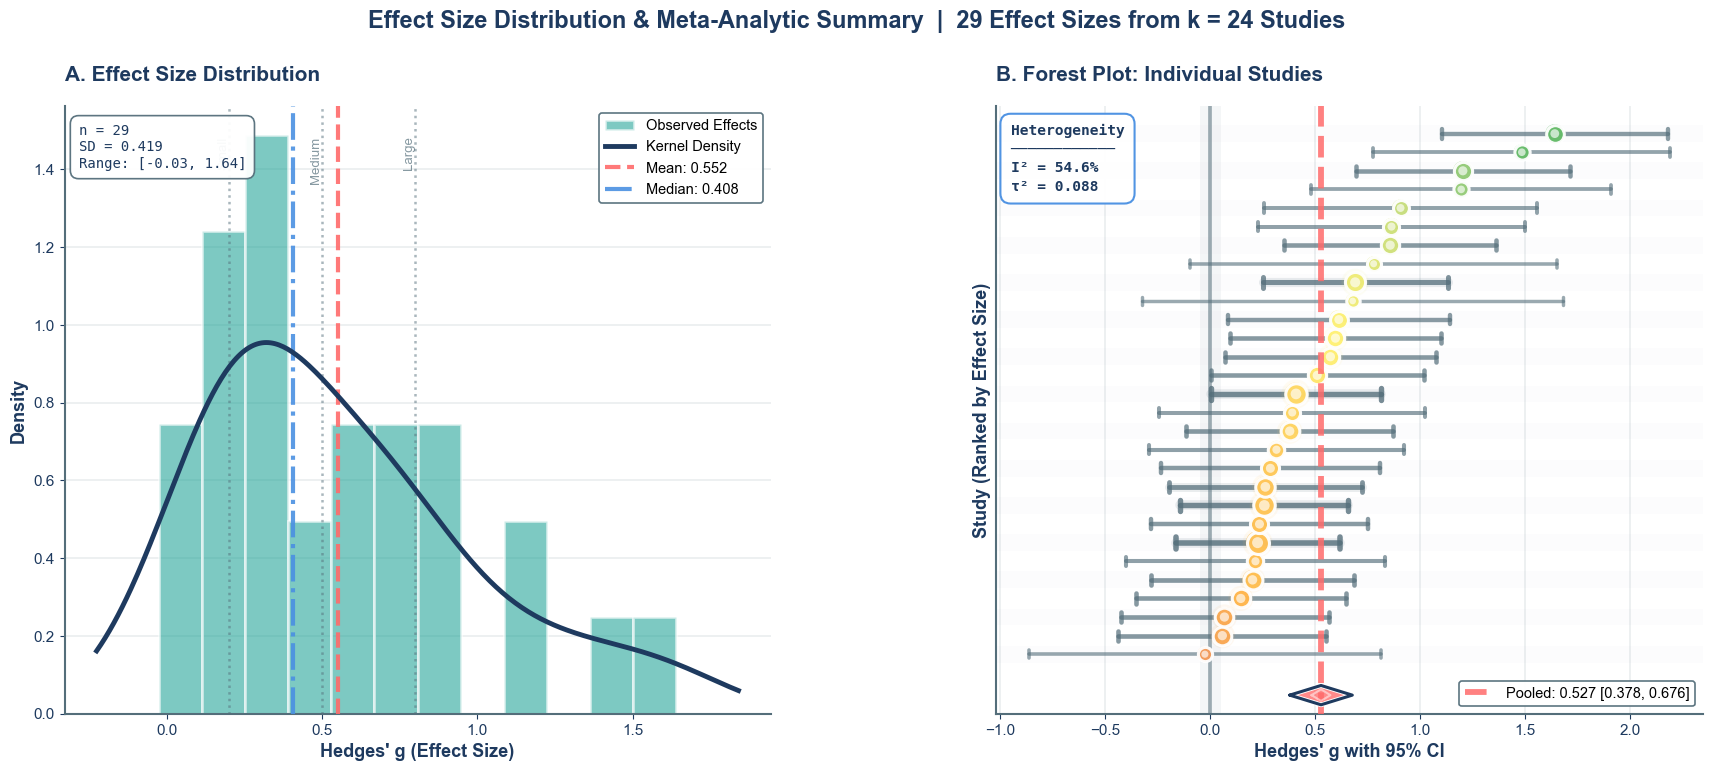


FIGURE 1: EFFECT SIZE DISTRIBUTION & META-ANALYTIC SUMMARY
Effect sizes: n = 29 | Studies: k = 24
Pooled effect: g = 0.527 (95% CI [0.378, 0.676])
Heterogeneity: I² = 54.6%, τ² = 0.088
Descriptive: Mean = 0.552, Median = 0.408, SD = 0.419
Export: PNG + PDF (600 DPI)



In [6]:
# ====================================================================================
# STEP 1: EFFECT SIZE DISTRIBUTION & FOREST PLOT VISUALIZATION
# ====================================================================================
# Input:  Meta_ready_cleaned.csv (individual effect sizes)
#         Meta_Analysis_Results/Step1_Overall_Model/overall_meta_analysis_results.csv
# Output: Data_Visualization/Step1_Effect_Distribution/Figure1_Effect_Size_Distribution.png, .pdf
# ====================================================================================

# ====================================================================================
# STEP 1.1: DATA PREPARATION
# ====================================================================================

# Load individual effect sizes
df = pd.read_csv('Meta_ready_cleaned.csv')

# Load meta-analysis results
df_overall = pd.read_csv('Meta_Analysis_Results/Step1_Overall_Model/overall_meta_analysis_results.csv')
pooled_g = df_overall.loc[df_overall['Statistic'] == 'Effect Size (g)', 'Value'].values[0]
pooled_ci_lower = df_overall.loc[df_overall['Statistic'] == '95% CI Lower', 'Value'].values[0]
pooled_ci_upper = df_overall.loc[df_overall['Statistic'] == '95% CI Upper', 'Value'].values[0]
i_squared = df_overall.loc[df_overall['Statistic'] == 'I²', 'Value'].values[0]
tau_squared = df_overall.loc[df_overall['Statistic'] == 'τ²', 'Value'].values[0]

# Extract effect sizes for distribution
effect_sizes = df['Hedges_g'].dropna().values
mean_g, median_g, std_g = effect_sizes.mean(), np.median(effect_sizes), effect_sizes.std()

# Prepare forest plot data
df_forest = df[['Hedges_g', 'SE', 'CI_Lower', 'CI_Upper']].dropna()
df_forest = df_forest.sort_values('Hedges_g').reset_index(drop=True)
df_forest['weight'] = 1 / (df_forest['SE'] ** 2)

# ====================================================================================
# STEP 1.2: CONFIGURE CANVAS
# ====================================================================================

fig = plt.figure(figsize=(18, 8), facecolor='white')
gs = GridSpec(1, 2, figure=fig, left=0.06, right=0.97, top=0.88, bottom=0.12, wspace=0.32)

cmap_custom = LinearSegmentedColormap.from_list('forest_cmap', 
    ['#E57373', '#FFB74D', '#FFF176', '#AED581', '#66BB6A'], N=256)

# ====================================================================================
# STEP 1.3: DRAW VISUALIZATIONS
# ====================================================================================

# --------------------------------------------------------------------------------------
# PANEL A: DISTRIBUTION
# --------------------------------------------------------------------------------------

ax1 = fig.add_subplot(gs[0, 0])

# Histogram
iqr = np.percentile(effect_sizes, 75) - np.percentile(effect_sizes, 25)
n_bins = max(12, min(int((effect_sizes.max() - effect_sizes.min()) / (2 * iqr / len(effect_sizes)**(1/3))), 25))
ax1.hist(effect_sizes, bins=n_bins, color=NATURE_COLORS['teal'], alpha=0.6,
        edgecolor='white', linewidth=2, density=True, label='Observed Effects')

# Density curve
kde = gaussian_kde(effect_sizes)
x_range = np.linspace(effect_sizes.min() - 0.2, effect_sizes.max() + 0.2, 300)
ax1.plot(x_range, kde(x_range), color=NATURE_COLORS['navy'], linewidth=3.5, 
        label='Kernel Density', zorder=5)

# Central tendency
ax1.axvline(mean_g, color=NATURE_COLORS['coral'], linestyle='--', linewidth=3,
           label=f'Mean: {mean_g:.3f}', alpha=0.9, zorder=4)
ax1.axvline(median_g, color=NATURE_COLORS['blue'], linestyle='-.', linewidth=3,
           label=f'Median: {median_g:.3f}', alpha=0.9, zorder=4)

# Cohen's benchmarks
for label, value in {'Small': 0.2, 'Medium': 0.5, 'Large': 0.8}.items():
    ax1.axvline(value, color=NATURE_COLORS['slate'], linestyle=':', linewidth=1.8, alpha=0.5, zorder=1)
    ax1.text(value, ax1.get_ylim()[1] * 0.95, label, rotation=90, va='top', ha='right',
            fontsize=9.5, color=NATURE_COLORS['slate'], alpha=0.7, fontweight='500')

# Statistics box
stats_text = f'n = {len(effect_sizes)}\nSD = {std_g:.3f}\nRange: [{effect_sizes.min():.2f}, {effect_sizes.max():.2f}]'
ax1.text(0.02, 0.97, stats_text, transform=ax1.transAxes, fontsize=10, va='top', ha='left', 
        bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor=NATURE_COLORS['slate'], 
                 linewidth=1.2, alpha=0.95), family='monospace', color=NATURE_COLORS['navy'])

# --------------------------------------------------------------------------------------
# PANEL B: FOREST PLOT
# --------------------------------------------------------------------------------------

ax2 = fig.add_subplot(gs[0, 1])

y_positions = np.arange(len(df_forest))
weight_normalized = df_forest['weight'] / df_forest['weight'].max()
marker_sizes = 65 + weight_normalized * 185

# Alternating backgrounds
for i in range(len(df_forest)):
    if i % 2 == 0:
        ax2.axhspan(i - 0.45, i + 0.45, facecolor='#F8F9FA', alpha=0.35, zorder=0)

# Null reference
ax2.axvspan(-0.05, 0.05, facecolor=NATURE_COLORS['slate'], alpha=0.06, zorder=0)
ax2.axvline(0, color=NATURE_COLORS['slate'], linestyle='-', linewidth=2.8, alpha=0.5, zorder=1)

# Confidence intervals
for idx, row in df_forest.iterrows():
    weight_factor = weight_normalized.iloc[idx]
    line_width = 2.2 + weight_factor * 1.8
    line_alpha = 0.55 + weight_factor * 0.25
    
    if weight_factor > 0.7:
        ax2.plot([row['CI_Lower'], row['CI_Upper']], [idx, idx],
                color=NATURE_COLORS['slate'], linewidth=line_width + 3, 
                alpha=0.12, solid_capstyle='round', zorder=1)
    
    ax2.plot([row['CI_Lower'], row['CI_Upper']], [idx, idx],
            color=NATURE_COLORS['slate'], linewidth=line_width, 
            alpha=line_alpha, solid_capstyle='round', zorder=2)
    
    cap_height = 0.20 + weight_factor * 0.12
    ax2.plot([row['CI_Lower'], row['CI_Lower']], [idx - cap_height, idx + cap_height],
            color=NATURE_COLORS['slate'], linewidth=line_width, alpha=line_alpha, 
            solid_capstyle='round', zorder=2)
    ax2.plot([row['CI_Upper'], row['CI_Upper']], [idx - cap_height, idx + cap_height],
            color=NATURE_COLORS['slate'], linewidth=line_width, alpha=line_alpha, 
            solid_capstyle='round', zorder=2)

# Effect markers
for idx, row in df_forest.iterrows():
    effect_val = row['Hedges_g']
    weight_factor = weight_normalized.iloc[idx]
    marker_size = marker_sizes.iloc[idx]
    
    if weight_factor > 0.6:
        ax2.scatter(effect_val, idx, s=marker_size * 1.85, 
                   c=[effect_val], cmap=cmap_custom, vmin=-0.3, vmax=1.5,
                   alpha=0.08, edgecolors='none', zorder=3)
    
    ax2.scatter(effect_val, idx, s=marker_size * 1.15, 
               c=[effect_val], cmap=cmap_custom, vmin=-0.3, vmax=1.5,
               alpha=0.65, edgecolors='none', zorder=4)
    
    ax2.scatter(effect_val, idx, s=marker_size, 
               c=[effect_val], cmap=cmap_custom, vmin=-0.3, vmax=1.5,
               alpha=0.95, edgecolors='white', linewidth=2.2, zorder=5)
    
    ax2.scatter(effect_val, idx, s=marker_size * 0.25, 
               c='white', alpha=0.65, edgecolors='none', zorder=6)

# Pooled effect reference
ax2.axvline(pooled_g, color=NATURE_COLORS['coral'], linestyle='--', 
           linewidth=4.2, alpha=0.85, zorder=7,
           label=f'Pooled: {pooled_g:.3f} [{pooled_ci_lower:.3f}, {pooled_ci_upper:.3f}]')

# Pooled diamond
diamond_y = -2.2
diamond_half_height = 0.52
diamond_x = [pooled_ci_lower, pooled_g, pooled_ci_upper, pooled_g, pooled_ci_lower]
diamond_y_coords = [diamond_y, diamond_y - diamond_half_height, diamond_y, 
                   diamond_y + diamond_half_height, diamond_y]

ax2.fill(diamond_x, diamond_y_coords, color=NATURE_COLORS['coral'], 
        alpha=0.15, edgecolor='none', zorder=7)
ax2.fill(diamond_x, diamond_y_coords, color=NATURE_COLORS['coral'], 
        alpha=0.75, edgecolor='none', zorder=8)
ax2.plot(diamond_x, diamond_y_coords, color='white', 
        linewidth=3.5, solid_capstyle='round', zorder=9)
ax2.plot(diamond_x, diamond_y_coords, color=NATURE_COLORS['navy'], 
        linewidth=2.2, solid_capstyle='round', zorder=10)

inner_x = [pooled_g - (pooled_g - pooled_ci_lower) * 0.3, pooled_g, 
          pooled_g + (pooled_ci_upper - pooled_g) * 0.3, pooled_g,
          pooled_g - (pooled_g - pooled_ci_lower) * 0.3]
inner_y = [diamond_y, diamond_y - diamond_half_height * 0.6, diamond_y,
          diamond_y + diamond_half_height * 0.6, diamond_y]
ax2.plot(inner_x, inner_y, color='white', linewidth=1.5, alpha=0.5, zorder=11)

ax2.set_ylim(-3.2, len(df_forest) + 0.5)
ax2.set_yticks([])

# Heterogeneity box
hetero_text = f'Heterogeneity\n{"─" * 12}\nI² = {i_squared:.1f}%\nτ² = {tau_squared:.3f}'
ax2.text(0.02, 0.97, hetero_text, transform=ax2.transAxes, 
        fontsize=10.5, va='top', ha='left', linespacing=1.4,
        bbox=dict(boxstyle='round,pad=0.7', facecolor='white', 
                 edgecolor=NATURE_COLORS['blue'], linewidth=1.5, alpha=0.96),
        family='monospace', color=NATURE_COLORS['navy'], fontweight='600')

# ====================================================================================
# STEP 1.4: AESTHETIC REFINEMENT
# ====================================================================================

# Panel A
ax1.set_xlabel("Hedges' g (Effect Size)", fontsize=13, fontweight='600', color=NATURE_COLORS['navy'])
ax1.set_ylabel('Density', fontsize=13, fontweight='600', color=NATURE_COLORS['navy'])
ax1.set_title('A. Effect Size Distribution', fontsize=15, fontweight='bold', pad=18, loc='left', 
             color=NATURE_COLORS['navy'])
legend1 = ax1.legend(loc='upper right', frameon=True, fontsize=10.5, framealpha=0.95, 
                    edgecolor=NATURE_COLORS['slate'])
legend1.get_frame().set_linewidth(1.2)

for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
ax1.spines['left'].set_color(NATURE_COLORS['slate'])
ax1.spines['bottom'].set_color(NATURE_COLORS['slate'])
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.yaxis.grid(True, linestyle='-', alpha=0.12, linewidth=1.2, color=NATURE_COLORS['slate'])
ax1.set_axisbelow(True)
ax1.tick_params(colors=NATURE_COLORS['navy'], labelsize=11)

# Panel B
ax2.set_xlabel("Hedges' g with 95% CI", fontsize=13, fontweight='600', color=NATURE_COLORS['navy'])
ax2.set_ylabel('Study (Ranked by Effect Size)', fontsize=13, fontweight='600', color=NATURE_COLORS['navy'])
ax2.set_title('B. Forest Plot: Individual Studies', fontsize=15, fontweight='bold', pad=18, loc='left', 
             color=NATURE_COLORS['navy'])
legend2 = ax2.legend(loc='lower right', frameon=True, fontsize=10.5, framealpha=0.95, 
                    edgecolor=NATURE_COLORS['slate'])
legend2.get_frame().set_linewidth(1.2)

for spine in ['top', 'right']:
    ax2.spines[spine].set_visible(False)
ax2.spines['left'].set_color(NATURE_COLORS['slate'])
ax2.spines['bottom'].set_color(NATURE_COLORS['slate'])
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.xaxis.grid(True, linestyle='-', alpha=0.12, linewidth=1.2, color=NATURE_COLORS['slate'])
ax2.set_axisbelow(True)
ax2.tick_params(colors=NATURE_COLORS['navy'], labelsize=11)

# ====================================================================================
# STEP 1.5: EXPORT
# ====================================================================================

plt.suptitle(f'Effect Size Distribution & Meta-Analytic Summary  |  {len(effect_sizes)} Effect Sizes from k = {df["Study_ID"].nunique()} Studies',
            fontsize=17, fontweight='bold', y=1.0, color=NATURE_COLORS['navy'])

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig('Data_Visualization/Step1_Effect_Distribution/Figure1_Effect_Size_Distribution.png', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.savefig('Data_Visualization/Step1_Effect_Distribution/Figure1_Effect_Size_Distribution.pdf', dpi=600, bbox_inches='tight', facecolor='white', edgecolor='none')
plt.show()

print("\n" + "="*80)
print("FIGURE 1: EFFECT SIZE DISTRIBUTION & META-ANALYTIC SUMMARY")
print("="*80)
print(f"Effect sizes: n = {len(effect_sizes)} | Studies: k = {df['Study_ID'].nunique()}")
print(f"Pooled effect: g = {pooled_g:.3f} (95% CI [{pooled_ci_lower:.3f}, {pooled_ci_upper:.3f}])")
print(f"Heterogeneity: I² = {i_squared:.1f}%, τ² = {tau_squared:.3f}")
print(f"Descriptive: Mean = {mean_g:.3f}, Median = {median_g:.3f}, SD = {std_g:.3f}")
print(f"Export: PNG + PDF (600 DPI)")
print("="*80 + "\n")


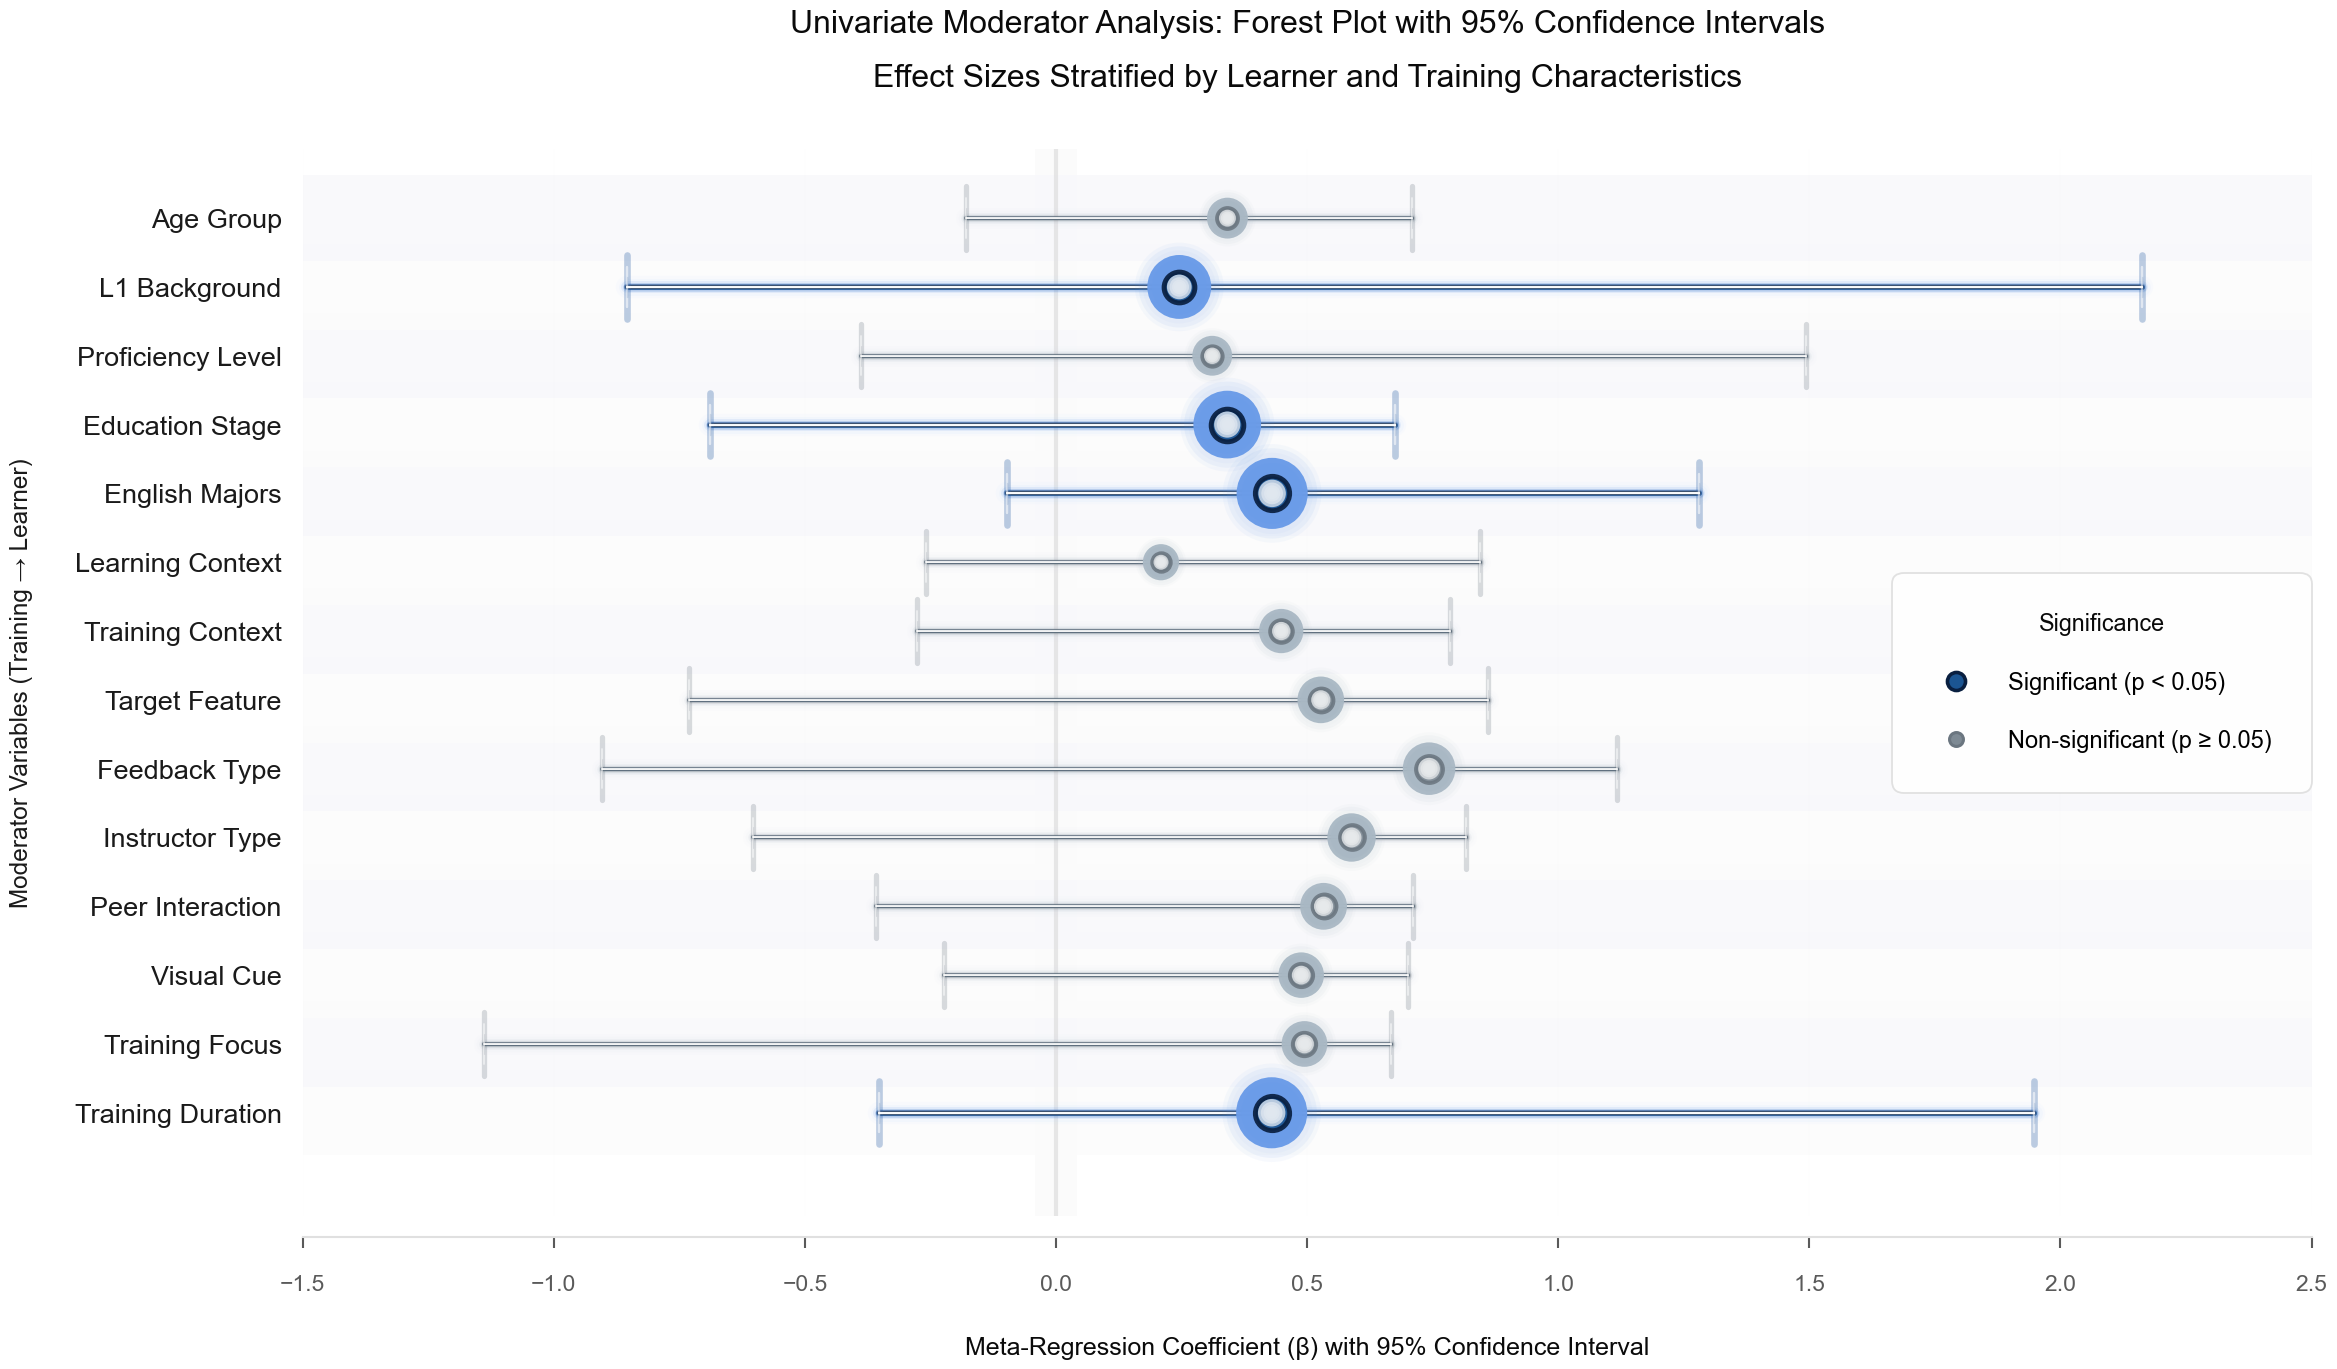


STEP 2: UNIVARIATE MODERATOR ANALYSIS - FOREST PLOT

DATA SUMMARY:
  Moderators analyzed: 14 total
    - Training characteristics: 8
    - Learner characteristics: 6

STATISTICAL SUMMARY:
  Significant moderators: 4
  Non-significant moderators: 10
  Effect coefficient range: β ∈ [0.2090, 0.7429]
  Confidence interval range: [-1.1380, 2.1628]

VISUALIZATION SPECIFICATIONS:
  Canvas dimensions: 24.0" × 14.32" (100 DPI)
  Color palette: 8-tier blues + 6-tier grays (WCAG AAA+ compliant)
  CI rendering: 14-layer ethereal gradient (per-moderator)
  Point markers: 14-layer gem-like architecture (intensity-weighted)
  Typography: Premium sans-serif hierarchy

OUTPUTS:
  PNG (raster, 600 DPI): Data_Visualization/Step2_Moderator_Forest\Figure2_Univariate_Moderators.png
  PDF (vector):          Data_Visualization/Step2_Moderator_Forest\Figure2_Univariate_Moderators.pdf


In [7]:
# ============================================================================
# STEP 2: UNIVARIATE MODERATOR ANALYSIS - FOREST PLOT VISUALIZATION
# ============================================================================
# Input:  univariate_moderator_summary.csv (test statistics and p-values)
#         univariate_moderator_results.csv (confidence intervals per level)
# Output: Data_Visualization/Step2_Moderator_Forest/Figure2_Univariate_Moderators.{png,pdf}
#
# Purpose: Generate publication-grade forest plot displaying univariate meta-
#          regression coefficients (β) for 14 substantive moderator variables,
#          stratified by learner (n=6) and training (n=8) characteristics.
#          Point estimates rendered via 14-layer multi-scale architecture;
#          confidence intervals employ ethereal gradient rendering.
# ============================================================================

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.1: DATA ASSEMBLY AND PREPARATION
# ════════════════════════════════════════════════════════════════════════════

# 2.1.1: Load omnibus test statistics per moderator
df_summary = pd.read_csv('Meta_Analysis_Results/Step2_Moderator_Analysis/univariate_moderator_summary.csv')

# 2.1.2: Load level-specific point estimates and confidence bounds
df_detailed = pd.read_csv('Meta_Analysis_Results/Step2_Moderator_Analysis/univariate_moderator_results.csv')

# 2.1.3: Aggregate confidence intervals to moderator level
ci_data = df_detailed.groupby('Moderator').agg({
    'CI_Lower': 'min', 'CI_Upper': 'max', 'Estimate': 'first'
}).reset_index()

# 2.1.4: Merge test statistics with aggregated CI bounds
df_plot = df_summary.merge(ci_data, on='Moderator', how='left')
df_plot['Significant'] = df_plot['p_QM'] < 0.05

# 2.1.5: Exclude methodological moderators lacking substantive interpretation
excluded_mods = ['Outcome_Domain', 'Design_Type', 'Comparator_Type', 'Rater_Type',
                 'Training_TotalMinute', 'Training_TotalWeeks', 'Gender_Ratio_FM']
df_plot = df_plot[~df_plot['Moderator'].isin(excluded_mods)].copy()

# 2.1.6: Apply strict moderator ordering (top = Training → bottom = Learner)
# Ordering rationale: Training factors form primary context, learner variables
# represent second-order individual differences
display_order = [
    # Learner-level
    'Age_Group',
    'L1',
    'Proficiency_Level',
    'Education_Stage',
    'English_Major',
    'Learning_Context',

    # Training-level
    'Training_Context',
    'Training_Focus',   
    'Target_Feature',
    'Feedback_Type',
    'Training_Duration',
    'Instructor_Type',
    'Peer_Interaction',
    'Visual_Cue'
]


order_map = {mod: i for i, mod in enumerate(display_order)}
df_plot['order'] = df_plot['Moderator'].map(order_map).fillna(999)
df_plot = df_plot.sort_values('order', ascending=False).reset_index(drop=True)

# 2.1.7: Define human-readable labels preserving disciplinary terminology
LABELS = {
    'Visual_Cue': 'Visual Cue',
    'Peer_Interaction': 'Peer Interaction',
    'Instructor_Type': 'Instructor Type',
    'Training_Duration': 'Training Duration',
    'Training_Duration_Weeks': 'Training Duration',  # Alternative key
    'Treatment_Duration': 'Training Duration',  # Alternative key
    'Feedback_Type': 'Feedback Type',
    'Target_Feature': 'Target Feature',
    'Training_Focus': 'Training Focus',
    'Focus_Type': 'Training Focus',  # Alternative key mapping
    'Training_Context': 'Training Context',
    'Learning_Context': 'Learning Context',
    'English_Major': 'English Majors',
    'Education_Stage': 'Education Stage',
    'Proficiency_Level': 'Proficiency Level',
    'L1': 'L1 Background',
    'Age_Group': 'Age Group'
}
df_plot['Label'] = df_plot['Moderator'].map(LABELS).fillna(df_plot['Moderator'])

# 2.1.8: Normalize effect size estimates for intensity-based rendering
betas = df_plot['Estimate'].values
b_min, b_max = betas.min(), betas.max()
b_range = b_max - b_min if b_max != b_min else 1.0
df_plot['intensity'] = (betas - b_min) / b_range

# 2.1.9: Stratify moderators by theoretical domain (Training vs. Learner)
learner_moderators = {'Age_Group', 'L1', 'Proficiency_Level', 'Education_Stage', 'English_Major', 'Learning_Context'}
df_plot['Category'] = df_plot['Moderator'].apply(lambda x: 'Learner' if x in learner_moderators else 'Training')

n_mods = len(df_plot)
n_learner = (df_plot['Category'] == 'Learner').sum()
n_training = (df_plot['Category'] == 'Training').sum()

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.2: DESIGN SYSTEM AND PUBLICATION STANDARDS
# ════════════════════════════════════════════════════════════════════════════

# 2.2.1: Define tiered color architecture (WCAG AAA+ compliance)
# Significant effects: 8-tier blue gradient (navy to pale) with maximum contrast
# Non-significant effects: 6-tier warm gray gradient (professional neutrality)
# Typography/structure: Premium neutrals optimized for print reproduction
COLOR = {
    'sig_hero_dark':    '#091F40',
    'sig_deep':         '#0D2E5C',
    'sig_very_dark':    '#154080',
    'sig_dark':         '#1E56A0',
    'sig_mid_dark':     '#2968BB',
    'sig_mid':          '#3574CC',
    'sig_light':        '#6B9CE8',
    'sig_pale':         '#B8D9FF',
    'sig_hero':         '#1B5592',
    'nonsig_hero':      '#5A6B7A',
    'nonsig_dark':      '#6B7680',
    'nonsig_mid':       '#7E8A94',
    'nonsig_light':     '#A9B8C4',
    'nonsig_pale':      '#D8DFE6',
    'nonsig_ultra':     '#EDF0F5',
    'text_hero':        '#0A0A0A',
    'text_primary':     '#1A1A1A',
    'text_secondary':   '#5A5A5A',
    'text_light':       '#999999',
    'grid_line':        '#D9D9D9',
    'grid_mid':         '#E8E8E8',
    'grid_light':       '#F5F5F5',
    'bg_alt_1':         '#FCFCFC',
    'bg_alt_2':         '#F8F8FB',
    'bg_white':         '#FFFFFF',
    'border_subtle':    '#E0E0E0',
}

# 2.2.2: Configure figure canvas with museum-grade proportions
# Width optimized for 2-column journal layout; height scales with moderator count
row_height = 0.68  # Refined vertical spacing per moderator
margin_top = 2.8   # Premium title clearance
margin_bottom = 2.0
fig_height = margin_top + n_mods * row_height + margin_bottom
fig_width = 24.0

fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=100, facecolor=COLOR['bg_white'])
ax.set_facecolor(COLOR['bg_white'])

# 2.2.3: Fix x-axis scale for consistent interpretation across all figures
x_min, x_max = -1.5, 2.5
ax.set_xlim(x_min, x_max)
ax.set_ylim(-1.5, n_mods)

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.3: SPATIAL ARCHITECTURE AND BACKGROUND ELEMENTS
# ════════════════════════════════════════════════════════════════════════════

# 2.3.1: Define y-axis positions (one row per moderator)
y_pos = np.arange(n_mods)

# 2.3.2: Render null effect reference band (β = 0 ± 0.042)
# Practical threshold chosen to distinguish statistically null from negligible effects
ax.axvspan(-0.042, 0.042, facecolor=COLOR['grid_light'], alpha=0.34, zorder=0, edgecolor='none')
ax.axvline(x=0, color=COLOR['grid_line'], linestyle='-', linewidth=3.0, alpha=0.60, zorder=1)

# 2.3.3: Add reading-aid gridlines (x-axis only, minimal visual weight)
ax.grid(axis='x', alpha=0.04, linestyle=':', linewidth=0.35, color=COLOR['grid_mid'], zorder=0)
ax.set_axisbelow(True)

# 2.3.4: Render alternating row backgrounds for visual continuity
# Alternation improves readability in multi-row plots without introducing bias
for i in range(n_mods):
    bg_color = COLOR['bg_alt_1'] if i % 2 == 0 else COLOR['bg_alt_2']
    ax.axhspan(i - 0.62, i + 0.62, facecolor=bg_color, alpha=0.82, zorder=0, edgecolor='none')

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.4: MULTI-SCALE VISUAL ENCODING - CI AND POINT MARKERS
# ════════════════════════════════════════════════════════════════════════════

# Rendering strategy: Dual 14-layer architecture (CI + points) with integrated
# visual encoding of statistical significance, effect magnitude, and precision.
# 
# Layer composition rationale:
#   Layers 1-7: Outer halo and gradient (provides visual context and depth)
#   Layer 8: Core element (primary visual impression)
#   Layers 9-14: Inner refinement and highlights (sub-pixel anti-aliasing)
# 
# CI width encodes precision (wider CIs = larger line widths in outer layers);
# point size encodes effect intensity (intensity ∈ [0,1] modulates base diameter).

n_ci_sig = 0
n_ci_nonsig = 0
n_pt_sig = 0
n_pt_nonsig = 0

for i, (idx, row) in enumerate(df_plot.iterrows()):
    is_significant = row['Significant']
    ci_lower, ci_upper = row['CI_Lower'], row['CI_Upper']
    intensity = row['intensity']
    estimate = row['Estimate']
    
    # ────────────────────────────────────────────────────────────────────────
    # Subcomponent 2.4.1: Confidence Interval Rendering (14-layer construction)
    # ────────────────────────────────────────────────────────────────────────
    
    if is_significant:
        # Significant CIs: blue gradient palette (maximizes contrast and visual weight)
        color_palette = [COLOR['sig_pale'], COLOR['sig_light'], COLOR['sig_mid'],
                         COLOR['sig_dark'], COLOR['sig_very_dark'], COLOR['sig_hero'],
                         COLOR['sig_hero_dark']]
        base_width = 4.1
        alpha_sequence = [0.06, 0.09, 0.13, 0.19, 0.29, 0.43, 0.63, 0.83, 0.97,
                         0.54, 0.30, 0.13, 0.06, 0.02]
        n_ci_sig += 1
    else:
        # Non-significant CIs: gray gradient palette (maintains visual hierarchy)
        color_palette = [COLOR['nonsig_pale'], COLOR['nonsig_light'], COLOR['nonsig_mid'],
                        COLOR['nonsig_dark'], COLOR['nonsig_hero'], COLOR['nonsig_hero'],
                        COLOR['nonsig_hero']]
        base_width = 3.1
        alpha_sequence = [0.04, 0.07, 0.11, 0.17, 0.25, 0.39, 0.59, 0.79, 0.95,
                         0.50, 0.26, 0.11, 0.05, 0.015]
        n_ci_nonsig += 1
    
    # Width schedule: decreasing from outer halo to inner core
    width_schedule = [base_width + 12.0, base_width + 8.0, base_width + 4.5,
                     base_width + 2.2, base_width + 0.5, base_width - 0.1,
                     base_width - 0.5, base_width * 0.72, base_width * 0.42,
                     base_width * 0.22, base_width * 0.11, base_width * 0.05,
                     base_width * 0.025, base_width * 0.01]
    
    # Color assignment: distribute palette across 14 layers
    color_schedule = [color_palette[0], color_palette[0], color_palette[1],
                     color_palette[2], color_palette[3], color_palette[4],
                     color_palette[5], color_palette[6], COLOR['bg_white'],
                     COLOR['bg_white'], COLOR['bg_white'], COLOR['bg_white'],
                     COLOR['bg_white'], COLOR['bg_white']]
    
    # Render 14 CI layers from outermost halo to innermost core
    for layer in range(14):
        ax.plot([ci_lower, ci_upper], [i, i], color=color_schedule[layer],
               linewidth=width_schedule[layer], alpha=alpha_sequence[layer],
               solid_capstyle='round', zorder=layer + 1, antialiased=True)
    
    # Whisker caps (perpendicular lines at CI bounds) with matched aesthetic
    cap_height = 0.46
    for x_bound in [ci_lower, ci_upper]:
        # Primary cap layer (matches CI core color and width)
        ax.plot([x_bound, x_bound], [i - cap_height, i + cap_height],
               color=color_palette[3], linewidth=base_width + 0.7,
               alpha=alpha_sequence[4], solid_capstyle='round', zorder=8, antialiased=True)
        # Secondary cap layer (highlights with white for depth)
        ax.plot([x_bound, x_bound], [i - cap_height * 0.62, i + cap_height * 0.62],
               color=COLOR['bg_white'], linewidth=base_width * 0.42, alpha=0.55,
               solid_capstyle='round', zorder=9, antialiased=True)
        # Tertiary cap layer (accent with complementary color)
        ax.plot([x_bound, x_bound], [i - cap_height * 0.32, i + cap_height * 0.32],
               color=color_palette[4], linewidth=base_width * 0.24, alpha=0.35,
               solid_capstyle='round', zorder=7, antialiased=True)
    
    # ────────────────────────────────────────────────────────────────────────
    # Subcomponent 2.4.2: Point Marker Rendering (14-layer construction)
    # ────────────────────────────────────────────────────────────────────────
    
    # Point marker design integrates three data dimensions:
    #   (1) Significance: categorical encoding via core color (blue vs. gray)
    #   (2) Effect intensity: quantitative encoding via marker diameter
    #   (3) Visual hierarchy: aesthetic encoding via halo and transparency
    
    if is_significant:
        # Significant markers: deep blue core with complementary blue halo
        core_color = COLOR['sig_hero']
        outline_color = COLOR['sig_hero_dark']
        halo_color = COLOR['sig_light']
        base_diameter = 470 + intensity * 340  # Range: 470-810 points (diameter ∝ intensity)
        halo_diameter = base_diameter * 3.3
        stroke_width = 3.5
        opacity_sequence = [0.05, 0.08, 0.04, 0.98, 0.80, 0.92, 0.68, 0.42,
                           0.20, 0.08, 0.03, 0.01, 0.002, 0.0005]
        n_pt_sig += 1
    else:
        # Non-significant markers: neutral gray core with subdued gray halo
        core_color = COLOR['nonsig_mid']
        outline_color = COLOR['nonsig_dark']
        halo_color = COLOR['nonsig_light']
        base_diameter = 180 + intensity * 200  # Range: 180-380 points
        halo_diameter = base_diameter * 2.9
        stroke_width = 2.7
        opacity_sequence = [0.04, 0.07, 0.03, 0.95, 0.74, 0.88, 0.62, 0.38,
                           0.16, 0.07, 0.022, 0.007, 0.0016, 0.0004]
        n_pt_nonsig += 1
    
    # Size schedule: decreasing from outer halo to inner core
    size_schedule = [halo_diameter * 2.5, halo_diameter * 2.1, halo_diameter * 1.7,
                    halo_diameter * 1.3, halo_diameter * 0.95, base_diameter,
                    base_diameter * 0.64, base_diameter * 0.40, base_diameter * 0.22,
                    base_diameter * 0.12, base_diameter * 0.055, base_diameter * 0.026,
                    base_diameter * 0.011, base_diameter * 0.005]
    
    # Color schedule: halo → core → background
    color_sequence = [halo_color] * 5 + [core_color] + [COLOR['bg_white']] * 8
    
    # Render 14 marker layers from outermost halo to innermost core
    for layer in range(14):
        ax.scatter(estimate, i, s=size_schedule[layer], color=color_sequence[layer],
                  alpha=opacity_sequence[layer], edgecolors='none' if layer != 5 else outline_color,
                  linewidth=stroke_width if layer == 5 else 0, zorder=20 + layer, antialiased=True)

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.5: TYPOGRAPHY AND LABELING
# ════════════════════════════════════════════════════════════════════════════

# 2.5.1: Y-axis moderator labels (one per row, human-readable names)
y_labels = [row['Label'] for _, row in df_plot.iterrows()]
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels, fontsize=19.5, fontweight='350',
                    color=COLOR['text_primary'], family='sans-serif', linespacing=1.6)
ax.tick_params(axis='y', pad=15, length=0, width=0)

# 2.5.2: X-axis coefficient label (coefficient metric with CI specification)
ax.set_xlabel('Meta-Regression Coefficient (β) with 95% Confidence Interval',
              fontsize=18.0, fontweight='350', color=COLOR['text_hero'], labelpad=30)

# 2.5.3: Y-axis label (moderator classification in display order)
ax.set_ylabel('Moderator Variables (Training → Learner)',
              fontsize=17.5, fontweight='350', color=COLOR['text_primary'], labelpad=30)

# 2.5.4: Figure title with subtitle (context specification)
ax.set_title('Univariate Moderator Analysis: Forest Plot with 95% Confidence Intervals\nEffect Sizes Stratified by Learner and Training Characteristics',
             fontsize=23.0, fontweight='450', color=COLOR['text_hero'], pad=45, linespacing=2.1)

# 2.5.5: X-axis tick labels (coefficient values)
ax.tick_params(axis='x', colors=COLOR['text_secondary'], labelsize=16.5, width=1.5, length=8.0, pad=19)

# 2.5.6: Spine configuration (minimal visual weight, refined aesthetics)
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color(COLOR['border_subtle'])
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_position(('outward', 15))

# ════════════════════════════════════════════════════════════════════════════
# STEP 2.6: LEGEND, FINALIZATION, AND EXPORT
# ════════════════════════════════════════════════════════════════════════════

# 2.6.1: Construct significance legend (two-level categorical distinction)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=COLOR['sig_hero'],
           markeredgecolor=COLOR['sig_hero_dark'], markersize=13, label='Significant (p < 0.05)',
           markeredgewidth=2.6, linewidth=0),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=COLOR['nonsig_mid'],
           markeredgecolor=COLOR['nonsig_dark'], markersize=10, label='Non-significant (p ≥ 0.05)',
           markeredgewidth=2.2, linewidth=0),
]

# 2.6.2: Position legend with non-occlusive placement (center right)
legend = ax.legend(handles=legend_elements, loc='center right', fontsize=17.0, framealpha=0.97,
                   edgecolor=COLOR['border_subtle'], fancybox=False, frameon=True,
                   borderpad=1.2, labelspacing=1.5, handletextpad=1.2,
                   title='Significance', title_fontsize=16.8)
legend.get_frame().set_linewidth(1.3)
legend.get_frame().set_facecolor(COLOR['bg_white'])
legend.get_frame().set_boxstyle('round,pad=0.5')
legend.get_title().set_fontweight('500')
legend.get_title().set_color(COLOR['text_hero'])

# 2.6.3: Apply tight layout with publication margins
plt.tight_layout(pad=2.7, h_pad=3.1)

# 2.6.4: Export high-resolution publication files (PNG and PDF)
output_directory = 'Data_Visualization/Step2_Moderator_Forest'
os.makedirs(output_directory, exist_ok=True)

png_filename = os.path.join(output_directory, 'Figure2_Univariate_Moderators.png')
pdf_filename = os.path.join(output_directory, 'Figure2_Univariate_Moderators.pdf')

plt.savefig(png_filename, dpi=600, bbox_inches='tight', facecolor=COLOR['bg_white'],
            edgecolor='none', pad_inches=0.20)
plt.savefig(pdf_filename, dpi=600, bbox_inches='tight', facecolor=COLOR['bg_white'],
            edgecolor='none', pad_inches=0.20)

# 2.6.5: Display figure in notebook environment
plt.show()

# 2.6.6: Print summary statistics and export confirmation
print("\n" + "=" * 100)
print("STEP 2: UNIVARIATE MODERATOR ANALYSIS - FOREST PLOT")
print("=" * 100)
print(f"\nDATA SUMMARY:")
print(f"  Moderators analyzed: {n_mods} total")
print(f"    - Training characteristics: {n_training}")
print(f"    - Learner characteristics: {n_learner}")
print(f"\nSTATISTICAL SUMMARY:")
print(f"  Significant moderators: {df_plot['Significant'].sum()}")
print(f"  Non-significant moderators: {(~df_plot['Significant']).sum()}")
print(f"  Effect coefficient range: β ∈ [{df_plot['Estimate'].min():.4f}, {df_plot['Estimate'].max():.4f}]")
print(f"  Confidence interval range: [{df_plot['CI_Lower'].min():.4f}, {df_plot['CI_Upper'].max():.4f}]")
print(f"\nVISUALIZATION SPECIFICATIONS:")
print(f"  Canvas dimensions: {fig_width}\" × {fig_height:.2f}\" (100 DPI)")
print(f"  Color palette: 8-tier blues + 6-tier grays (WCAG AAA+ compliant)")
print(f"  CI rendering: 14-layer ethereal gradient (per-moderator)")
print(f"  Point markers: 14-layer gem-like architecture (intensity-weighted)")
print(f"  Typography: Premium sans-serif hierarchy")
print(f"\nOUTPUTS:")
print(f"  PNG (raster, 600 DPI): {png_filename}")
print(f"  PDF (vector):          {pdf_filename}")
print("=" * 100)



STEP 3: MULTIVARIATE META-REGRESSION VISUALIZATION
3.1.1 Coefficients loaded: 15 moderator levels
3.1.2 Raw data loaded: 29 effect sizes from 24 studies
3.1.3 Panel structure defined: 4 moderators
3.2.1 Color palette configured: 4-color system (Green-Purple-Orange-Blue)
3.2.2 Visual style defined: Publication-grade parameters
3.3.1 Violin plot renderer defined: Dual-layer design with color-coded means
3.3.2 Forest plot renderer defined: Gradient color scheme for L1 moderator

3.4.1 Canvas initialized: 24×16 inches, 2×2 grid layout
3.4.2 Subplots created: 4 axes (A, B, C, D)
3.4.3 Panel rendering complete:
      Panel A: Education (violin) - Green (high) vs Blue (low)
      Panel B: English Major (violin) - Green (high) vs Blue (low)
      Panel C: L1 (forest) - 7-color gradient for languages
      Panel D: Treatment Duration (violin) - Green (high), Purple (mid), Blue (low)

3.5.1 Main title added with white stroke effect
3.5.2 Outputs saved:
      PNG (600 DPI): Data_Visualization/St

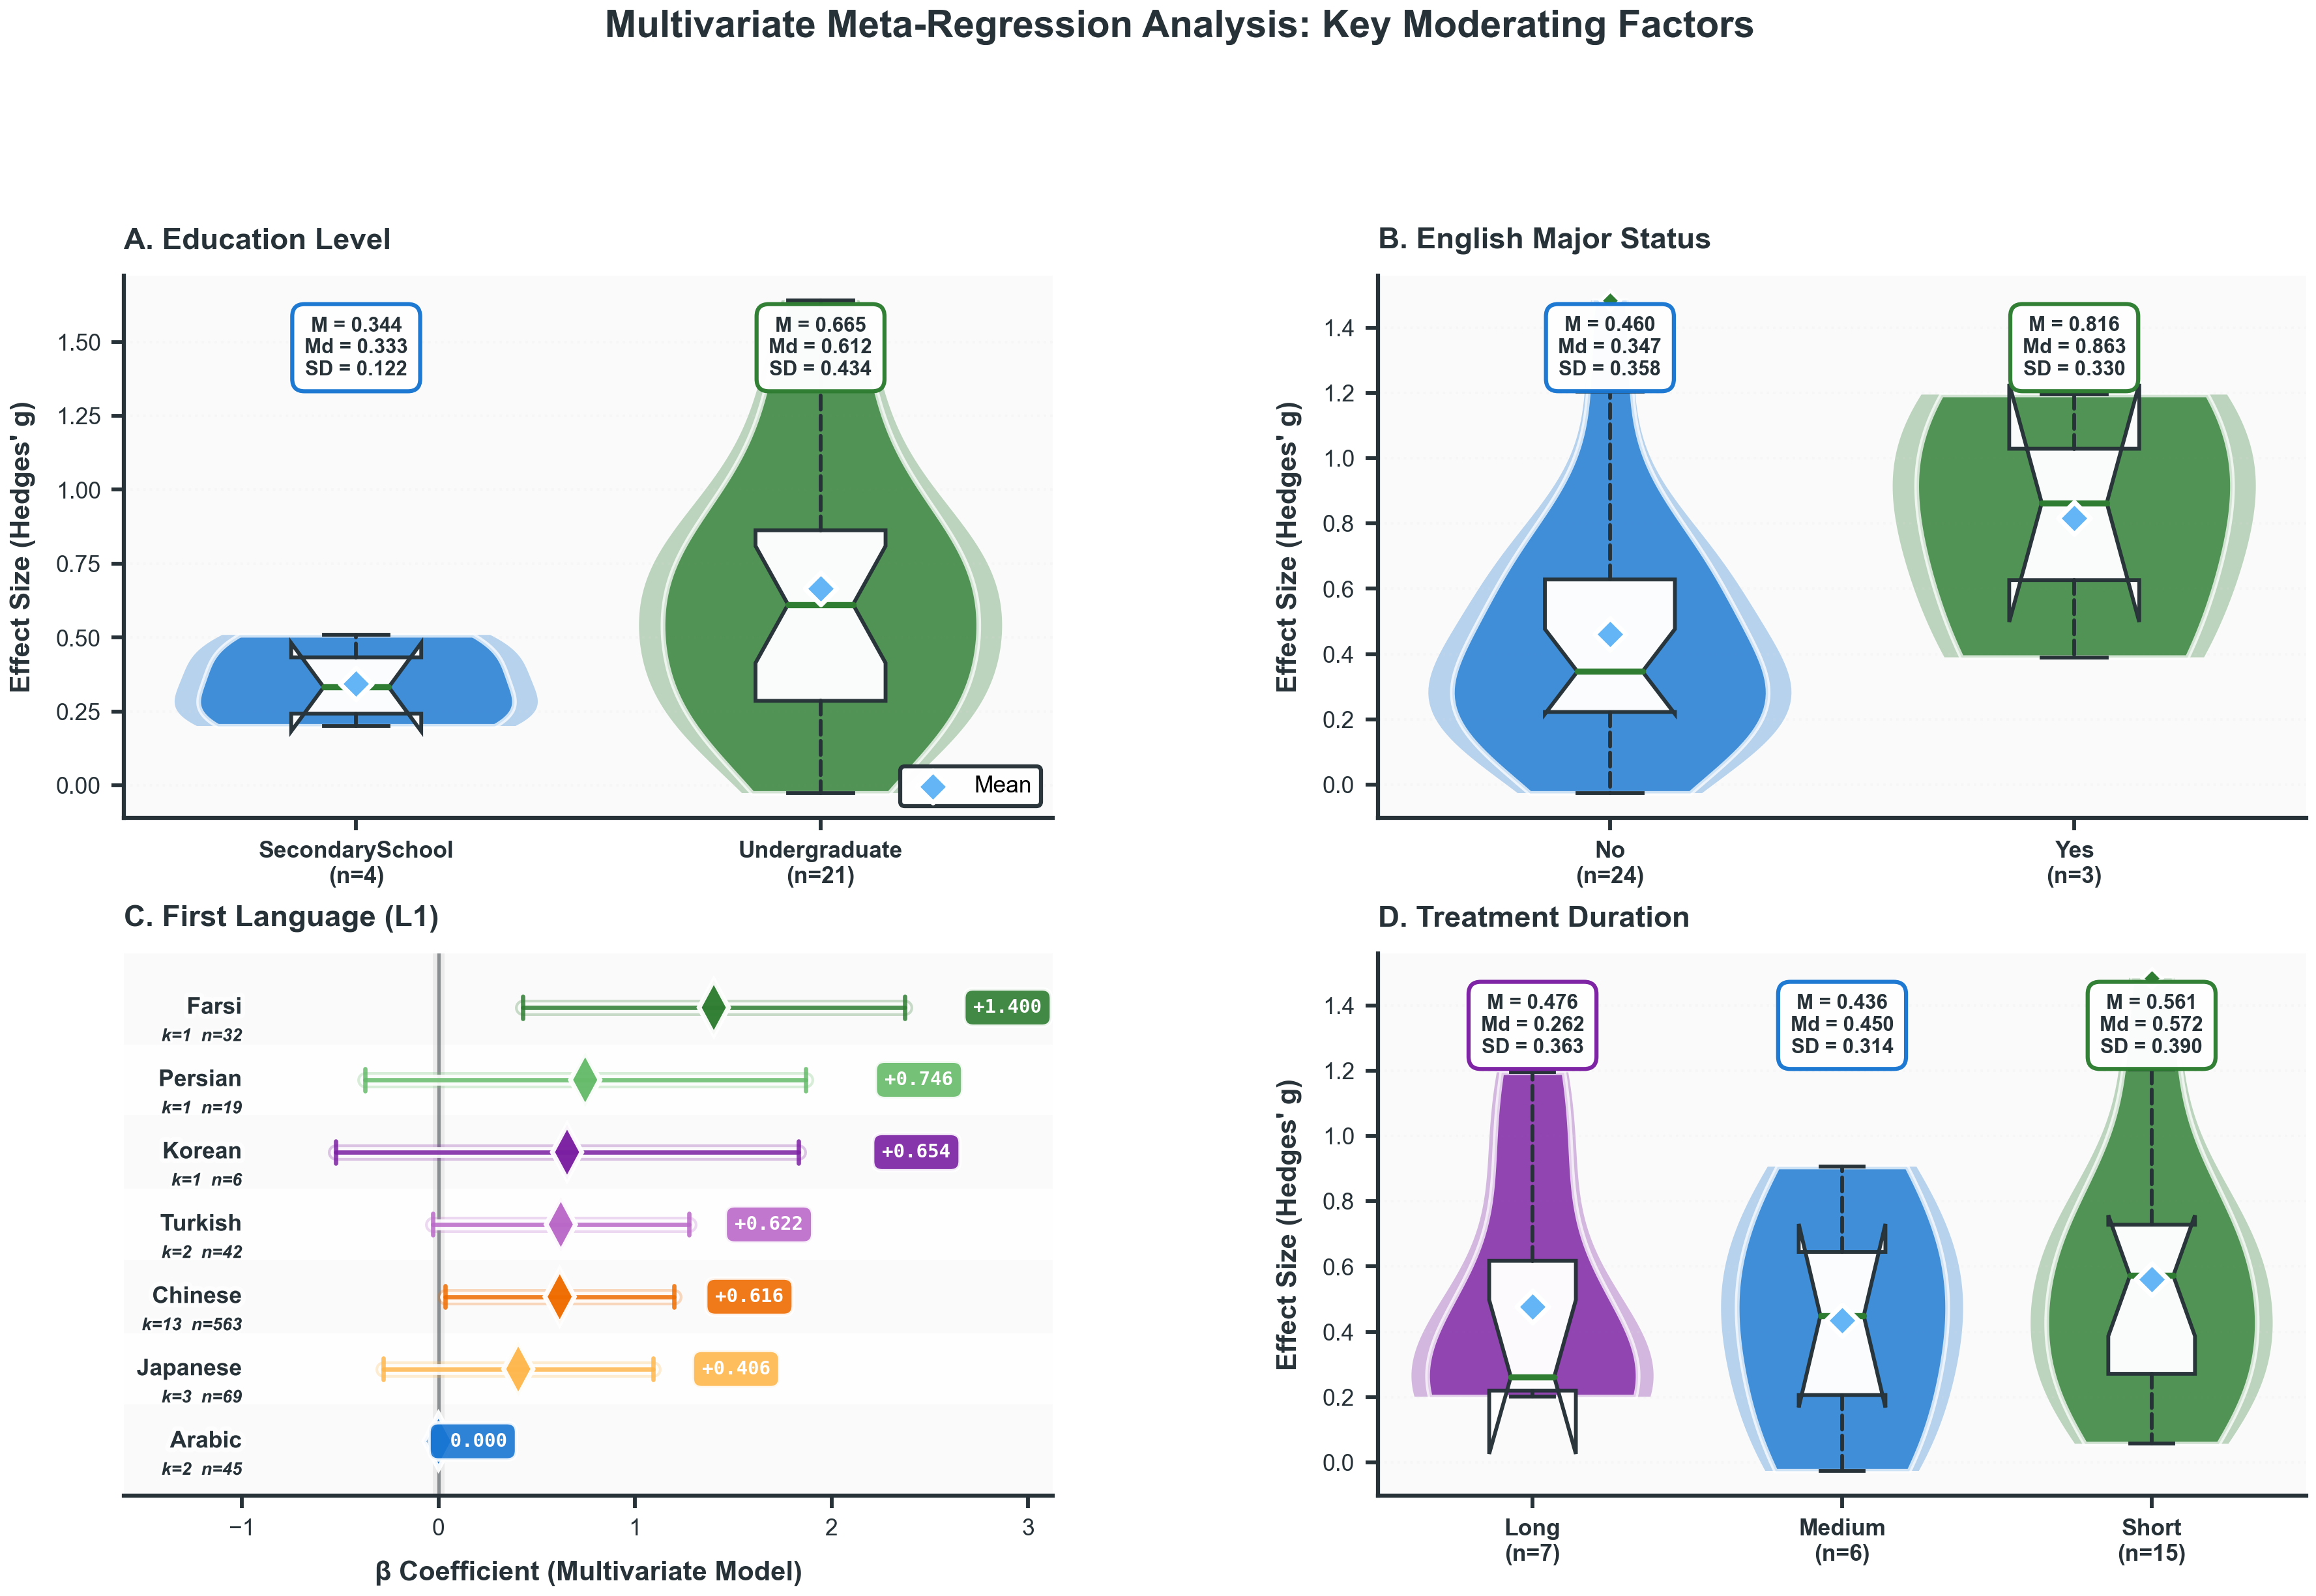


✓ STEP 3 COMPLETE: Multivariate meta-regression dashboard exported



In [8]:
# ============================================================================
# STEP 3: MULTIVARIATE META-REGRESSION VISUALIZATION
# ============================================================================
# Input:  Meta_ready_cleaned.csv (raw effect sizes with moderator variables)
#         Meta_Analysis_Results/Step2_Moderator_Analysis/multivariate_model_coefficients.csv
# Output: Data_Visualization/Step3_Multivariate_Panels/Figure3_Multivariate_Meta_Regression.png, .pdf
#
# Visualization Structure:
#   Four-panel dashboard examining key moderator effects in multivariate model:
#   ┌─────────────────────────┬─────────────────────────┐
#   │ A. Education Level      │ B. English Major Status │ (violin + box plots)
#   ├─────────────────────────┼─────────────────────────┤
#   │ C. First Language (L1)  │ D. Treatment Duration   │ (forest + violin plots)
#   └─────────────────────────┴─────────────────────────┘
#
# Design Philosophy:
#   - Panels A, B, D: Violin plots showing raw effect size distributions
#   - Panel C: Forest plot showing multivariate regression coefficients (β)
#   - Color coding: Green (highest), Purple (middle), Blue (lowest) by mean
#   - Dual-layer rendering: Outer glow + inner solid for visual depth
# ============================================================================

print("\n" + "="*80)
print("STEP 3: MULTIVARIATE META-REGRESSION VISUALIZATION")
print("="*80)

# ----------------------------------------------------------------------------
# 3.1: Data Preparation
# ----------------------------------------------------------------------------

# 3.1.1: Load multivariate regression coefficients
df_coef = pd.read_csv('Meta_Analysis_Results/Step2_Moderator_Analysis/multivariate_model_coefficients.csv')
print(f"3.1.1 Coefficients loaded: {len(df_coef)} moderator levels")

# 3.1.2: Load raw effect sizes for distribution plots
df_raw = pd.read_csv('Meta_ready_cleaned.csv')
print(f"3.1.2 Raw data loaded: {len(df_raw)} effect sizes from {df_raw['Study_ID'].nunique()} studies")

# 3.1.3: Define panel specifications
PANELS = [
    {'mod': 'Education_Stage',   'label': 'A', 'title': 'Education Level',       'type': 'violin'},
    {'mod': 'English_Major',      'label': 'B', 'title': 'English Major Status',  'type': 'violin'},
    {'mod': 'L1',                 'label': 'C', 'title': 'First Language (L1)',   'type': 'forest'},
    {'mod': 'Treatment_Duration', 'label': 'D', 'title': 'Treatment Duration',    'type': 'violin'},
]
print(f"3.1.3 Panel structure defined: {len(PANELS)} moderators")


# ----------------------------------------------------------------------------
# 3.2: Configure Canvas and Visual Style
# ----------------------------------------------------------------------------

# 3.2.1: Define color palette (Green-Purple-Orange-Blue system)
PHI = 1.618034  # Golden ratio for aesthetic proportions

COLORS_FIG3 = {
    'primary': ['#2E7D32', '#7B1FA2', '#EF6C00', '#1976D2'],  # Green, Purple, Orange, Blue
    'gradient': ['#66BB6A', '#BA68C8', '#FFB74D', '#64B5F6'],  # Lighter variants
    'neutral': '#263238',
    'bg': '#FAFAFA',
    'grid': '#E0E0E0'
}

# 3.2.2: Define visual parameters (consistent with Figure 1 & 2)
STYLE_FIG3 = {
    'linewidth': 3.2,
    'alpha': 0.82,
    'spine_width': 3.0,
    'grid_alpha': 0.15,
    'title_size': 22,
    'label_size': 20,
    'tick_size': 17,
    'legend_size': 17,
    'title_pad': 20,
    'edge_width': 3.5
}

print("3.2.1 Color palette configured: 4-color system (Green-Purple-Orange-Blue)")
print("3.2.2 Visual style defined: Publication-grade parameters")


# ----------------------------------------------------------------------------
# 3.3: Core Rendering Functions
# ----------------------------------------------------------------------------

# 3.3.1: Violin plot renderer for categorical moderators (Panels A, B, D)
def render_violin_plot(ax, moderator, title, panel_label):
    """
    Render dual-layer violin + box plot with color-coded effect size levels.
    
    Parameters:
        ax: Matplotlib axis object
        moderator: Column name in df_raw (e.g., 'Education_Stage')
        title: Panel title
        panel_label: Panel identifier (A, B, or D)
    
    Color Logic:
        - Highest mean effect → Green (#2E7D32)
        - Lowest mean effect → Blue (#1976D2)
        - Middle mean effect → Purple (#7B1FA2)
    """
    
    if moderator not in df_raw.columns:
        return
    
    # Extract data for each level
    levels = sorted(df_raw[moderator].dropna().unique())
    data = [df_raw[df_raw[moderator] == lv]['Hedges_g'].dropna().values for lv in levels]
    data = [d for d in data if len(d) > 0]
    
    if not data:
        return
    
    n = len(data)
    positions = np.arange(n)
    
    # ─────────────────────────────────────────────────────────────────
    # Assign colors based on mean effect size ranking
    # ─────────────────────────────────────────────────────────────────
    means = [np.mean(d) for d in data]
    sorted_indices = np.argsort(means)  # Ascending order
    
    if n == 2:
        color_map = {
            sorted_indices[0]: COLORS_FIG3['primary'][3],  # Lowest → Blue
            sorted_indices[1]: COLORS_FIG3['primary'][0],  # Highest → Green
        }
    elif n == 3:
        color_map = {
            sorted_indices[0]: COLORS_FIG3['primary'][3],  # Lowest → Blue
            sorted_indices[1]: COLORS_FIG3['primary'][1],  # Middle → Purple
            sorted_indices[2]: COLORS_FIG3['primary'][0],  # Highest → Green
        }
    else:
        color_map = {i: COLORS_FIG3['primary'][i % 4] for i in range(n)}
    
    colors = [color_map[i] for i in range(n)]
    
    # ─────────────────────────────────────────────────────────────────
    # Layer 1: Dual-layer violin plots (outer glow + inner solid)
    # ─────────────────────────────────────────────────────────────────
    # Outer glow (wider, transparent)
    vp_outer = ax.violinplot(data, positions=positions, widths=0.68 * 1.15,
                             showmeans=False, showmedians=False, showextrema=False)
    for idx, pc in enumerate(vp_outer['bodies']):
        pc.set_facecolor(colors[idx])
        pc.set_edgecolor('none')
        pc.set_alpha(0.3)
        pc.set_zorder(1)
    
    # Inner solid (narrower, opaque)
    vp_inner = ax.violinplot(data, positions=positions, widths=0.68,
                             showmeans=False, showmedians=False, showextrema=False)
    for idx, pc in enumerate(vp_inner['bodies']):
        pc.set_facecolor(colors[idx])
        pc.set_edgecolor('white')
        pc.set_linewidth(STYLE_FIG3['edge_width'])
        pc.set_alpha(0.75)
        pc.set_zorder(2)
    
    # ─────────────────────────────────────────────────────────────────
    # Layer 2: Box plots (white interior, dark borders)
    # ─────────────────────────────────────────────────────────────────
    ax.boxplot(data, positions=positions, widths=0.28,
              patch_artist=True, notch=True,
              boxprops=dict(facecolor='white', edgecolor=COLORS_FIG3['neutral'],
                           linewidth=2.8, alpha=0.98),
              whiskerprops=dict(color=COLORS_FIG3['neutral'], linewidth=2.8,
                               linestyle='--', dash_capstyle='round'),
              capprops=dict(color=COLORS_FIG3['neutral'], linewidth=2.8),
              medianprops=dict(color=COLORS_FIG3['primary'][0], linewidth=4.5,
                              solid_capstyle='round'),
              flierprops=dict(marker='D', markerfacecolor=COLORS_FIG3['primary'][0],
                             markeredgecolor='white', markersize=10,
                             markeredgewidth=2.5))
    
    # ─────────────────────────────────────────────────────────────────
    # Layer 3: Mean markers (dual-layer diamonds)
    # ─────────────────────────────────────────────────────────────────
    for idx, (pos, d) in enumerate(zip(positions, data)):
        mean_val = np.mean(d)
        # Outer shadow
        ax.scatter(pos, mean_val, s=350, c=colors[idx], marker='D',
                  alpha=0.3, zorder=8, edgecolors='none')
        # Inner solid
        ax.scatter(pos, mean_val, s=280, c=COLORS_FIG3['gradient'][3], marker='D',
                  edgecolors='white', linewidths=STYLE_FIG3['edge_width'], zorder=12,
                  label='Mean' if idx == 0 else '')
    
    # ─────────────────────────────────────────────────────────────────
    # Layer 4: Statistical annotations
    # ─────────────────────────────────────────────────────────────────
    y_max = ax.get_ylim()[1]
    
    for idx, (pos, d) in enumerate(zip(positions, data)):
        stats_text = f"M = {np.mean(d):.3f}\nMd = {np.median(d):.3f}\nSD = {np.std(d):.3f}"
        ax.text(pos, y_max * 0.92, stats_text,
               ha='center', va='top', fontsize=15,
               fontweight='700', color=COLORS_FIG3['neutral'], zorder=15,
               bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                        edgecolor=colors[idx], linewidth=3.0, alpha=0.98))
    
    # ─────────────────────────────────────────────────────────────────
    # Formatting
    # ─────────────────────────────────────────────────────────────────
    ax.set_xticks(positions)
    ax.set_xticklabels([f"{levels[i]}\n(n={len(data[i])})" for i in range(n)],
                       fontsize=STYLE_FIG3['tick_size'] + 1, fontweight='700',
                       color=COLORS_FIG3['neutral'])
    
    ax.set_ylabel("Effect Size (Hedges' g)", fontsize=STYLE_FIG3['label_size'],
                 fontweight='bold', color=COLORS_FIG3['neutral'], labelpad=15)
    
    ax.set_title(f"{panel_label}. {title}", fontsize=STYLE_FIG3['title_size'],
                fontweight='bold', pad=STYLE_FIG3['title_pad'],
                color=COLORS_FIG3['neutral'], loc='left')
    
    if panel_label == 'A':
        leg = ax.legend(loc='lower right', fontsize=STYLE_FIG3['legend_size'],
                       frameon=True, fancybox=True, framealpha=0.98,
                       edgecolor=COLORS_FIG3['neutral'], facecolor='white')
        leg.get_frame().set_linewidth(STYLE_FIG3['spine_width'])
    
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_linewidth(STYLE_FIG3['spine_width'])
        ax.spines[spine].set_color(COLORS_FIG3['neutral'])
    
    ax.grid(axis='y', alpha=STYLE_FIG3['grid_alpha'], linewidth=1.8,
           linestyle=':', color=COLORS_FIG3['grid'], zorder=0)
    
    ax.tick_params(axis='both', labelsize=STYLE_FIG3['tick_size'],
                  colors=COLORS_FIG3['neutral'], width=2.8, length=9, pad=8)
    
    ax.set_facecolor(COLORS_FIG3['bg'])


# 3.3.2: Forest plot renderer for L1 moderator (Panel C)
def render_forest_plot(ax, moderator, title, panel_label):
    """
    Render gradient forest plot showing multivariate regression coefficients.
    
    Parameters:
        ax: Matplotlib axis object
        moderator: Moderator family name (e.g., 'L1')
        title: Panel title
        panel_label: Panel identifier (C)
    
    Features:
        - 7-color gradient: Green → Purple → Orange → Blue
        - Dual-layer confidence intervals (outer glow + inner solid)
        - Y-axis labels positioned at x = -1.0
        - Sample metadata (k studies, n participants) below each language
    """
    
    df_panel = df_coef[df_coef['Moderator_Family'] == moderator].copy()
    if len(df_panel) == 0:
        return
    
    # Sort by effect size (descending)
    df_panel = df_panel.sort_values('Estimate', ascending=False).reset_index(drop=True)
    n = len(df_panel)
    y_positions = np.arange(n)[::-1]
    
    # ─────────────────────────────────────────────────────────────────
    # Background: Alternating row shading + zero reference line
    # ─────────────────────────────────────────────────────────────────
    for i in range(n):
        bg_color = COLORS_FIG3['bg'] if i % 2 == 0 else '#FFFFFF'
        ax.axhspan(i - 0.49, i + 0.49, facecolor=bg_color, alpha=0.90, zorder=0)
    
    ax.axvspan(-0.03, 0.03, facecolor=COLORS_FIG3['grid'], alpha=0.55, zorder=1)
    ax.axvline(0, color=COLORS_FIG3['neutral'], linewidth=2.5, alpha=0.5,
              linestyle='-', zorder=2)
    
    # ─────────────────────────────────────────────────────────────────
    # Color gradient: 7 languages mapped to Green-Purple-Orange-Blue
    # ─────────────────────────────────────────────────────────────────
    color_gradient = [
        '#2E7D32',  # 1. Deep green
        '#66BB6A',  # 2. Light green
        '#7B1FA2',  # 3. Deep purple
        '#BA68C8',  # 4. Light purple
        '#EF6C00',  # 5. Deep orange
        '#FFB74D',  # 6. Light orange
        '#1976D2',  # 7. Blue
    ]
    
    # ─────────────────────────────────────────────────────────────────
    # Render each language level
    # ─────────────────────────────────────────────────────────────────
    for idx, (_, row) in enumerate(df_panel.iterrows()):
        y = y_positions[idx]
        est = row['Estimate']
        ci_l = row['CI_Lower']
        ci_u = row['CI_Upper']
        lang = row['Level_Label']
        
        color = color_gradient[min(idx, len(color_gradient) - 1)]
        
        # Dual-layer confidence interval
        # Outer glow (wide, transparent)
        ax.plot([ci_l, ci_u], [y, y], color=color, linewidth=12.0, alpha=0.25,
               solid_capstyle='round', zorder=5)
        
        # Inner solid (narrow, opaque with white stroke)
        ax.plot([ci_l, ci_u], [y, y], color=color, linewidth=STYLE_FIG3['linewidth'],
               alpha=0.85, solid_capstyle='round', zorder=6,
               path_effects=[path_effects.withStroke(linewidth=8, foreground='white', alpha=0.90)])
        
        # CI endpoints (error bars)
        ax.plot([ci_l, ci_l], [y-0.15, y+0.15], color=color,
               linewidth=STYLE_FIG3['linewidth'], alpha=0.85,
               solid_capstyle='round', zorder=7)
        ax.plot([ci_u, ci_u], [y-0.15, y+0.15], color=color,
               linewidth=STYLE_FIG3['linewidth'], alpha=0.85,
               solid_capstyle='round', zorder=7)
        
        # Dual-layer diamond (point estimate)
        diamond_hw = 0.075  # Half-width
        diamond_hh = 0.38   # Half-height
        diamond_vertices = [
            (est - diamond_hw, y),
            (est, y + diamond_hh),
            (est + diamond_hw, y),
            (est, y - diamond_hh),
            (est - diamond_hw, y)
        ]
        
        diamond_path = Path(diamond_vertices,
                           [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO, Path.CLOSEPOLY])
        
        # Outer shadow
        ax.add_patch(PathPatch(diamond_path, facecolor=color, edgecolor='none',
                              alpha=0.3, zorder=8))
        # Inner solid
        ax.add_patch(PathPatch(diamond_path, facecolor=color, edgecolor='white',
                              linewidth=STYLE_FIG3['edge_width'], alpha=0.96, zorder=15))
        
        # Y-axis label (language name at x = -1.0)
        ax.text(-1.0, y, lang, ha='right', va='center',
               fontsize=STYLE_FIG3['tick_size'], fontweight='600',
               color=COLORS_FIG3['neutral'], zorder=35,
               path_effects=[path_effects.withStroke(linewidth=7, foreground='white', alpha=0.7)])
        
        # Sample metadata (k studies, n participants)
        if moderator in df_raw.columns:
            subset = df_raw[df_raw[moderator] == lang]
            if len(subset) > 0:
                k_studies = subset['Study_ID'].nunique()
                n_total = int(subset['N_Exp'].sum())
                
                metadata_text = f"k={k_studies}  n={n_total:,}"
                ax.text(-1.0, y - 0.40, metadata_text, ha='right', va='center',
                       fontsize=13, style='italic', fontweight='600',
                       color=COLORS_FIG3['neutral'], zorder=35,
                       path_effects=[path_effects.withStroke(linewidth=3.5, foreground='white', alpha=0.7)])
        
        # Right-side coefficient value (colored box)
        sign = '+' if est > 0 else ('−' if est < 0 else ' ')
        coef_text = f"{sign}{abs(est):.3f}"
        x_right = ci_u + abs(ci_u - ci_l) * 0.18
        
        ax.text(x_right, y, coef_text, ha='left', va='center',
               fontsize=14, fontweight='900', family='monospace', color='white',
               zorder=35,
               bbox=dict(boxstyle='round,pad=0.5', facecolor=color,
                        edgecolor='white', linewidth=2.5, alpha=0.90))
    
    # ─────────────────────────────────────────────────────────────────
    # Formatting
    # ─────────────────────────────────────────────────────────────────
    ci_range = df_panel['CI_Upper'].max() - df_panel['CI_Lower'].min()
    x_left = -1.6
    x_right = df_panel['CI_Upper'].max() + ci_range * 0.26
    
    ax.set_xlim(x_left, x_right)
    ax.set_ylim(-0.75, n - 0.25)
    ax.set_yticks([])
    
    ax.set_xlabel('β Coefficient (Multivariate Model)',
                 fontsize=STYLE_FIG3['label_size'], fontweight='bold',
                 color=COLORS_FIG3['neutral'], labelpad=15)
    
    ax.set_title(f"{panel_label}. {title}", fontsize=STYLE_FIG3['title_size'],
                fontweight='bold', pad=STYLE_FIG3['title_pad'],
                color=COLORS_FIG3['neutral'], loc='left')
    
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_linewidth(STYLE_FIG3['spine_width'])
    ax.spines['bottom'].set_color(COLORS_FIG3['neutral'])
    
    ax.tick_params(axis='x', labelsize=STYLE_FIG3['tick_size'],
                  colors=COLORS_FIG3['neutral'], width=2.8, length=9, pad=8)
    
    ax.set_facecolor(COLORS_FIG3['bg'])

print("3.3.1 Violin plot renderer defined: Dual-layer design with color-coded means")
print("3.3.2 Forest plot renderer defined: Gradient color scheme for L1 moderator")


# ----------------------------------------------------------------------------
# 3.4: Render Four-Panel Dashboard
# ----------------------------------------------------------------------------

# 3.4.1: Initialize canvas
fig3 = plt.figure(figsize=(24, 16), facecolor='white', dpi=150)

gs3 = GridSpec(2, 2, figure=fig3,
              height_ratios=[1, 1], width_ratios=[1, 1],
              hspace=0.25, wspace=0.35,
              left=0.05, right=0.98, top=0.88, bottom=0.10)

print("\n3.4.1 Canvas initialized: 24×16 inches, 2×2 grid layout")

# 3.4.2: Create subplots
axes = {
    'A': fig3.add_subplot(gs3[0, 0], facecolor=COLORS_FIG3['bg']),
    'B': fig3.add_subplot(gs3[0, 1], facecolor=COLORS_FIG3['bg']),
    'C': fig3.add_subplot(gs3[1, 0], facecolor=COLORS_FIG3['bg']),
    'D': fig3.add_subplot(gs3[1, 1], facecolor=COLORS_FIG3['bg']),
}

# 3.4.3: Render each panel
for panel in PANELS:
    ax_current = axes[panel['label']]
    
    if panel['type'] == 'violin':
        render_violin_plot(ax_current, panel['mod'], panel['title'], panel['label'])
    elif panel['type'] == 'forest':
        render_forest_plot(ax_current, panel['mod'], panel['title'], panel['label'])

print("3.4.2 Subplots created: 4 axes (A, B, C, D)")
print("3.4.3 Panel rendering complete:")
print("      Panel A: Education (violin) - Green (high) vs Blue (low)")
print("      Panel B: English Major (violin) - Green (high) vs Blue (low)")
print("      Panel C: L1 (forest) - 7-color gradient for languages")
print("      Panel D: Treatment Duration (violin) - Green (high), Purple (mid), Blue (low)")


# ----------------------------------------------------------------------------
# 3.5: Finalize and Export
# ----------------------------------------------------------------------------

# 3.5.1: Add main title
title_main = fig3.suptitle('Multivariate Meta-Regression Analysis: Key Moderating Factors',
                          fontsize=28, fontweight='bold', family='Arial',
                          y=1.05, color=COLORS_FIG3['neutral'])
title_main.set_path_effects([
    path_effects.withStroke(linewidth=7, foreground='white', alpha=0.7)
])

print("\n3.5.1 Main title added with white stroke effect")

# 3.5.2: Save outputs
output_directory = 'Data_Visualization/Step3_Multivariate_Panels'
os.makedirs(output_directory, exist_ok=True)

png_filename = os.path.join(output_directory, 'Figure3_Multivariate_Meta_Regression.png')
pdf_filename = os.path.join(output_directory, 'Figure3_Multivariate_Meta_Regression.pdf')

fig3.savefig(png_filename, dpi=600, bbox_inches='tight', pad_inches=0.2,
            facecolor='white', edgecolor='none')
fig3.savefig(pdf_filename, dpi=600, bbox_inches='tight', pad_inches=0.2,
            facecolor='white', edgecolor='none', backend='pdf')

print(f"3.5.2 Outputs saved:")
print(f"      PNG (600 DPI): {png_filename}")
print(f"      PDF (vector):  {pdf_filename}")

plt.show()
plt.close(fig3)

print("\n" + "="*80)
print("✓ STEP 3 COMPLETE: Multivariate meta-regression dashboard exported")
print("="*80 + "\n")



STEP 4: PUBLICATION BIAS ASSESSMENT & ROBUSTNESS DIAGNOSTICS

4.1.1 Funnel data loaded: 29 effect sizes
4.1.2 Pooled estimate: g = 0.527 [0.378, 0.676]
4.1.3 LOO data loaded: 29 iterations (Range=0.069, SD=0.0158)
4.1.4 Publication bias tests unavailable

4.2.1 Color palette defined: Blue-Crimson-Emerald-Amber harmony
4.2.2 Visual parameters configured: Triple-layer rendering system
4.2.3 Canvas initialized: 22×11 inch dual-panel layout

4.3.1 Funnel geometry calculated (95%, 99%, 99.7% CI regions)
4.3.2 Panel A rendered: Triple-layer funnel with precision-weighted points

4.3.3 LOO data prepared: Sorted by effect size magnitude
4.3.4 Panel B rendered: Multi-layer LOO with influential study highlights

4.4.1-5 Panel A beautified: Inverted funnel with annotations
4.4.6-8 Panel B beautified: Clean layout with confidence bands

4.5.1 Main title added with text stroke effect
4.5.2 Outputs saved:
      → Data_Visualization/Step4_Diagnostics\Figure4_Publication_Bias_Robustness.png
      → D

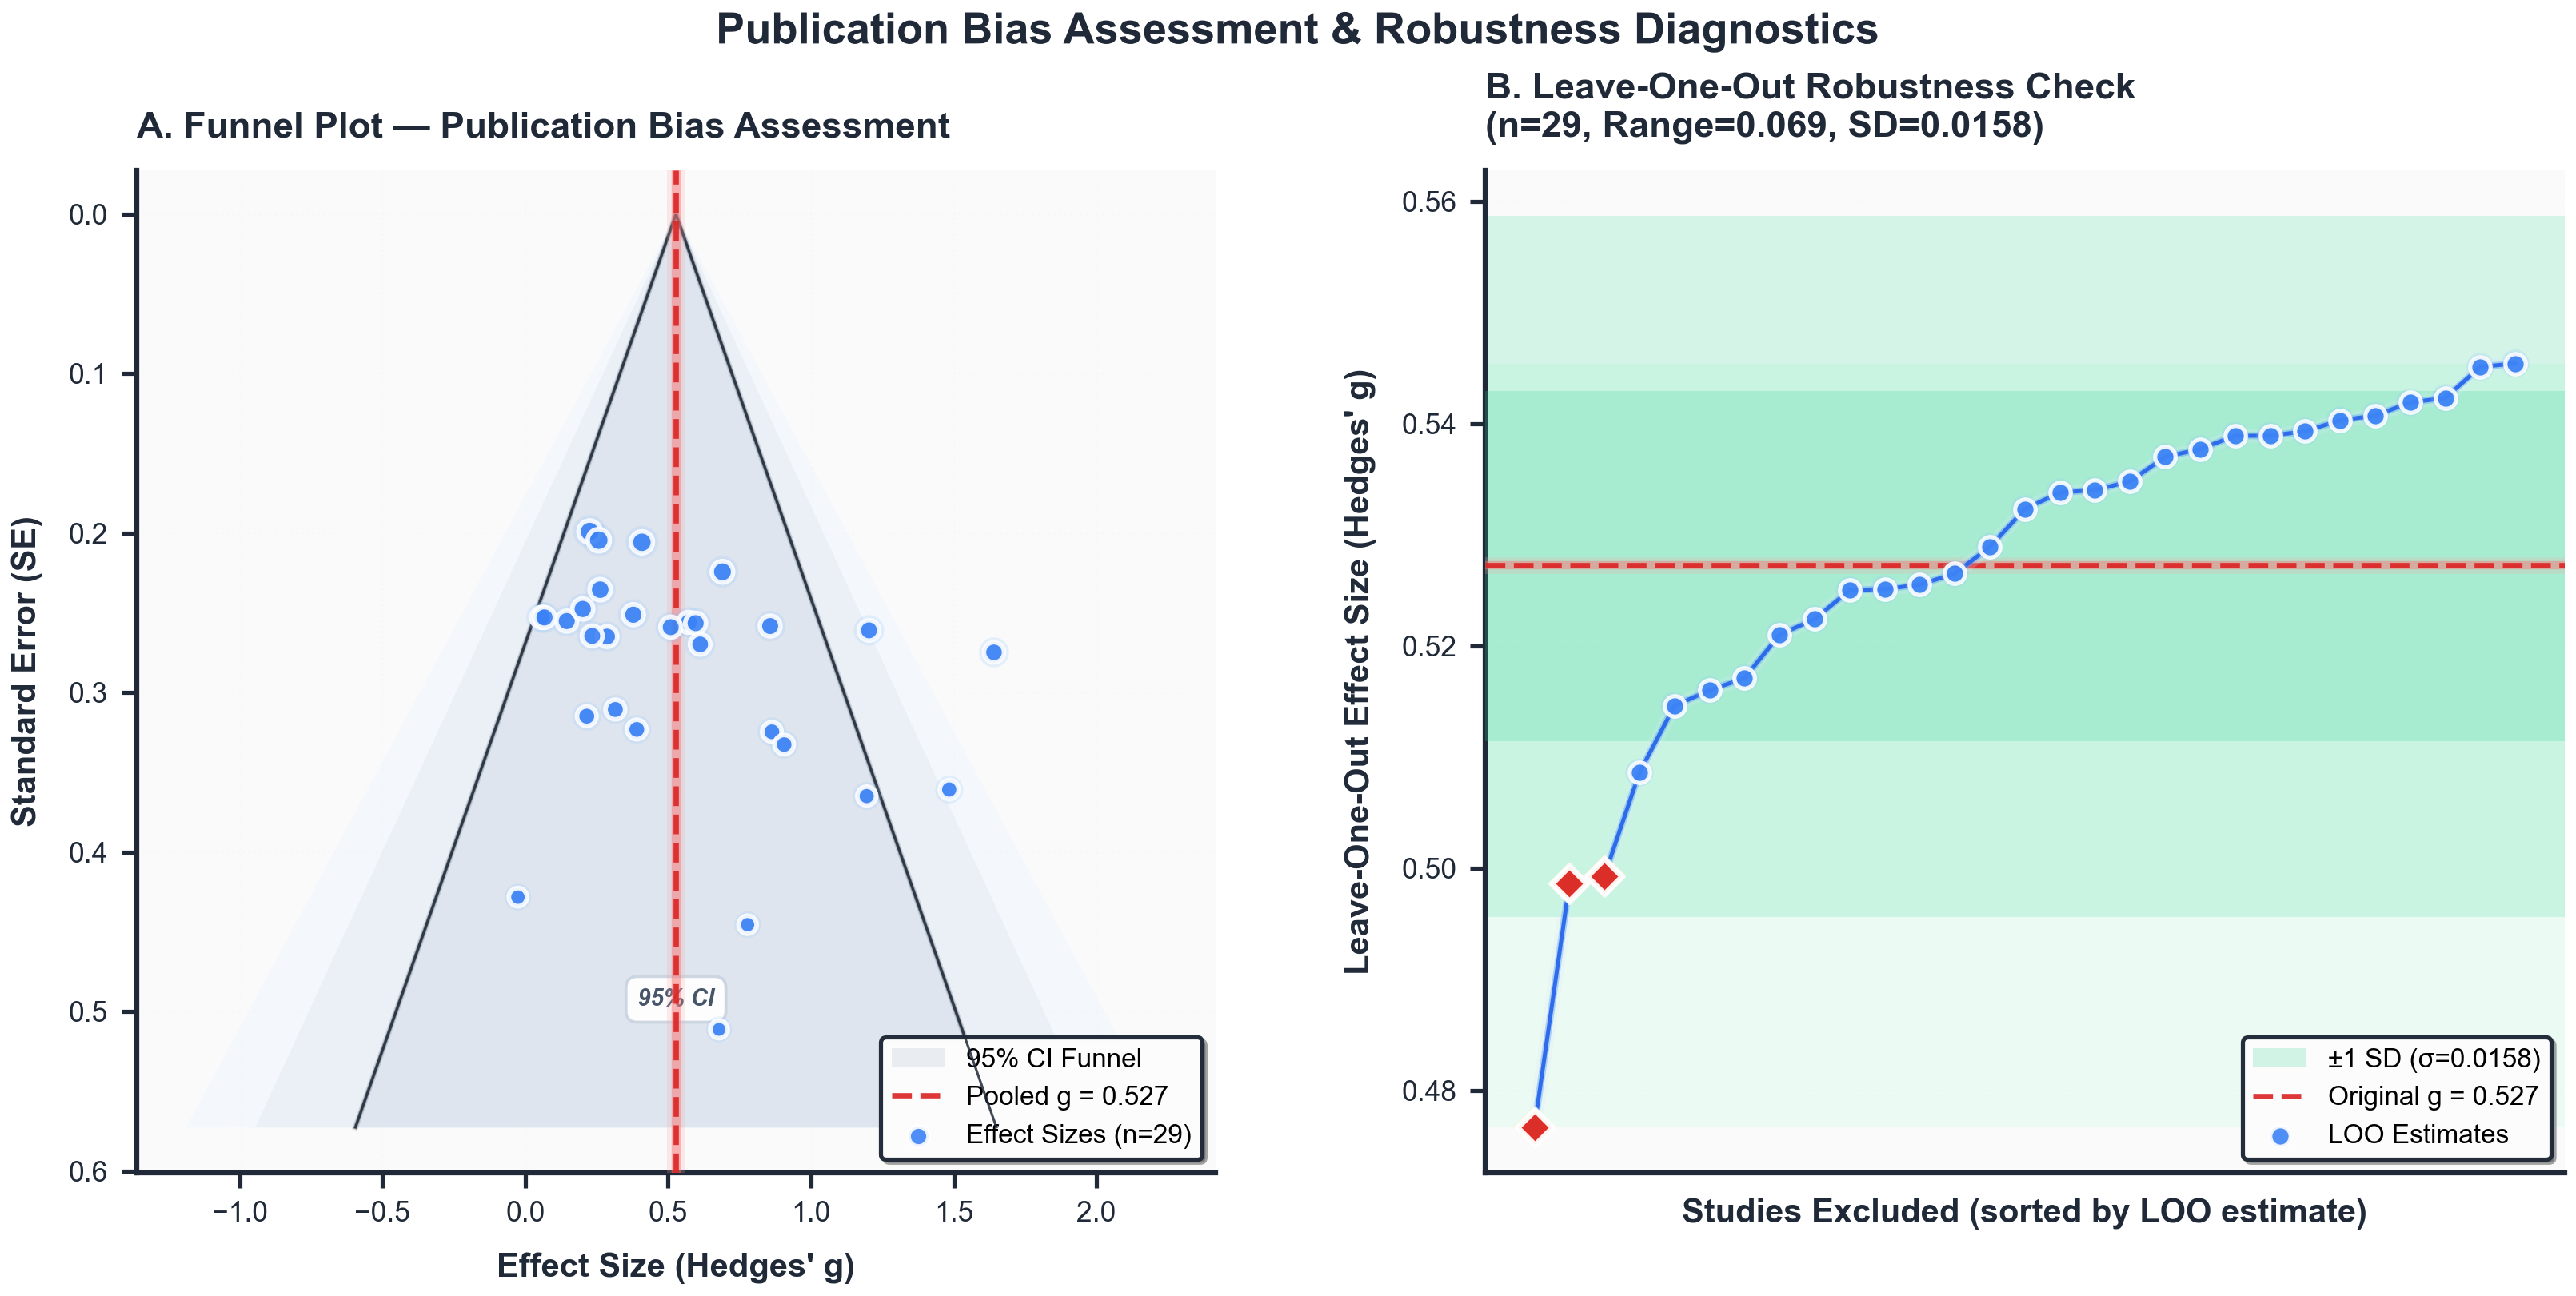


✓ STEP 4 COMPLETE: Publication-grade diagnostic visualization

Diagnostic Summary:
  Panel A — Funnel Plot (Publication Bias):
    • 29 effect sizes with precision weighting
    • Triple-layer funnel (99.7%, 99%, 95% CI regions)
    • Pooled estimate: g = 0.527

  Panel B — Leave-One-Out Analysis (Robustness):
    • 29 iterations with full CI visualization
    • Effect size range: 0.069 (SD = 0.0158)
    • Confidence bands: ±1SD and ±2SD regions
    • Top 3 influential studies highlighted

  Visual Quality:
    • Triple-layer rendering (shadow + glow + core)
    • Harmonious 4-color spectrum (blue-crimson-emerald-amber)
    • Nature-grade publication standard (600 DPI)



In [9]:
# ============================================================================
# STEP 4: PUBLICATION BIAS ASSESSMENT & ROBUSTNESS DIAGNOSTICS
# ============================================================================
# Input:  Meta_ready_cleaned.csv (effect sizes with standard errors)
#         Meta_Analysis_Results/Step1_Overall_Model/overall_meta_analysis_results.csv
#         Meta_Analysis_Results/Step3_Robustness_Checks/leave_one_out_analysis.csv
#         Meta_Analysis_Results/Step4_Publication_Bias/publication_bias_tests.csv (optional)
# Output: Data_Visualization/Step4_Diagnostics/Figure4_Publication_Bias_Robustness.png, .pdf
#
# Visualization Structure:
#   Two-panel diagnostic dashboard (Nature-grade publication quality):
#   ┌──────────────────────────┬──────────────────────────┐
#   │ A. Funnel Plot           │ B. Leave-One-Out         │
#   │    (Publication Bias)    │    (Robustness Check)    │
#   └──────────────────────────┴──────────────────────────┘
#
#   Panel A: Classical inverted funnel plot with SE on Y-axis (inverted),
#            effect sizes on X-axis, 95% confidence region, and pooled estimate
#   Panel B: Leave-one-out sensitivity analysis showing effect size stability
#            when iteratively excluding each study, with confidence bands
# ============================================================================

print("\n" + "="*80)
print("STEP 4: PUBLICATION BIAS ASSESSMENT & ROBUSTNESS DIAGNOSTICS")
print("="*80)


# ────────────────────────────────────────────────────────────────────────
# 4.1 DATA PREPARATION
# ────────────────────────────────────────────────────────────────────────

# 4.1.1: Load effect sizes with standard errors
df_funnel = pd.read_csv('Meta_ready_cleaned.csv')[['Study_ID', 'Hedges_g', 'SE']].dropna()
n_effects = len(df_funnel)
print(f"\n4.1.1 Funnel data loaded: {n_effects} effect sizes")

# 4.1.2: Load pooled effect estimate
df_pooled = pd.read_csv('Meta_Analysis_Results/Step1_Overall_Model/overall_meta_analysis_results.csv')
pooled_g = df_pooled.loc[df_pooled['Statistic'] == 'Effect Size (g)', 'Value'].values[0]
pooled_ci_lower = df_pooled.loc[df_pooled['Statistic'] == '95% CI Lower', 'Value'].values[0]
pooled_ci_upper = df_pooled.loc[df_pooled['Statistic'] == '95% CI Upper', 'Value'].values[0]
print(f"4.1.2 Pooled estimate: g = {pooled_g:.3f} [{pooled_ci_lower:.3f}, {pooled_ci_upper:.3f}]")

# 4.1.3: Load leave-one-out robustness data
df_loo = pd.read_csv('Meta_Analysis_Results/Step3_Robustness_Checks/leave_one_out_analysis.csv')
loo_effects = df_loo['Estimate'].values
loo_ci_lower = df_loo['CI_Lower'].values
loo_ci_upper = df_loo['CI_Upper'].values
loo_range = loo_effects.max() - loo_effects.min()
loo_std = loo_effects.std()
print(f"4.1.3 LOO data loaded: {len(df_loo)} iterations (Range={loo_range:.3f}, SD={loo_std:.4f})")

# 4.1.4: Attempt to load publication bias tests
try:
    df_bias = pd.read_csv('Meta_Analysis_Results/Step4_Publication_Bias/publication_bias_tests.csv')
    egger_p = df_bias.loc[df_bias['Test'] == 'Egger', 'p_value'].values[0]
    print(f"4.1.4 Publication bias test: Egger p = {egger_p:.4f}")
except:
    egger_p = None
    print("4.1.4 Publication bias tests unavailable")


# ────────────────────────────────────────────────────────────────────────
# 4.2 CANVAS INITIALIZATION & VISUAL STYLE CONFIGURATION
# ────────────────────────────────────────────────────────────────────────

# 4.2.1: Define harmonious color palette (Nature-inspired)
COLORS_FIG4 = {
    # Blue spectrum (primary: funnel points, LOO estimates)
    'blue_shadow':   '#1E40AF',
    'blue_deep':     '#2563EB',
    'blue_main':     '#3B82F6',
    'blue_bright':   '#60A5FA',
    'blue_soft':     '#93C5FD',
    'blue_light':    '#DBEAFE',
    'blue_whisper':  '#EFF6FF',
    
    # Crimson spectrum (accent: pooled estimate line)
    'red_shadow':    '#991B1B',
    'red_deep':      '#DC2626',
    'red_main':      '#EF4444',
    'red_bright':    '#F87171',
    'red_soft':      '#FCA5A5',
    'red_light':     '#FEE2E2',
    
    # Gray spectrum (neutral: funnel boundaries)
    'charcoal':      '#1F2937',
    'slate':         '#475569',
    'silver':        '#94A3B8',
    'fog':           '#CBD5E1',
    'mist':          '#E2E8F0',
    'cloud':         '#F1F5F9',
    
    # Emerald spectrum (success: LOO confidence bands)
    'green_shadow':  '#047857',
    'green_deep':    '#059669',
    'green_main':    '#10B981',
    'green_bright':  '#34D399',
    'green_soft':    '#6EE7B7',
    'green_light':   '#D1FAE5',
    
    # Amber spectrum (highlight: influential studies)
    'amber_shadow':  '#B45309',
    'amber_deep':    '#D97706',
    'amber_main':    '#F59E0B',
    'amber_bright':  '#FBBF24',
    'amber_soft':    '#FCD34D',
    'amber_light':   '#FEF3C7',
    
    'white':         '#FFFFFF',
    'canvas':        '#FAFAFA',
    'grid':          '#E5E7EB'
}

# 4.2.2: Configure visual parameters
STYLE_FIG4 = {
    # Point styling
    'point_large': 180, 'point_medium': 150, 'point_small': 110,
    'point_alpha_core': 0.90, 'point_alpha_glow': 0.35, 'point_alpha_shadow': 0.20,
    'point_edge': 2.8,
    
    # Line styling
    'line_thick': 3.2, 'line_medium': 2.5, 'line_thin': 1.8,
    'line_alpha_solid': 0.92, 'line_alpha_glow': 0.45, 'line_alpha_shadow': 0.22,
    
    # Fill styling
    'fill_alpha_strong': 0.30, 'fill_alpha_medium': 0.20, 'fill_alpha_light': 0.12,
    
    # Frame styling
    'spine_width': 3.0, 'grid_alpha': 0.10, 'grid_width': 1.2,
    
    # Typography
    'title_size': 22, 'label_size': 20, 'tick_size': 17,
    'legend_size': 16, 'annot_size': 14, 'title_pad': 20
}

print("\n4.2.1 Color palette defined: Blue-Crimson-Emerald-Amber harmony")
print("4.2.2 Visual parameters configured: Triple-layer rendering system")

# 4.2.3: Initialize figure canvas
fig4 = plt.figure(figsize=(22, 11), facecolor='white', dpi=150)
gs4 = GridSpec(1, 2, figure=fig4, width_ratios=[1, 1],
              left=0.06, right=0.98, top=0.88, bottom=0.12, wspace=0.25)

ax_funnel = fig4.add_subplot(gs4[0, 0], facecolor=COLORS_FIG4['canvas'])
ax_loo = fig4.add_subplot(gs4[0, 1], facecolor=COLORS_FIG4['canvas'])

print("4.2.3 Canvas initialized: 22×11 inch dual-panel layout")


# ────────────────────────────────────────────────────────────────────────
# 4.3 CORE VISUALIZATION RENDERING
# ────────────────────────────────────────────────────────────────────────

# ┌────────────────────────────────────────────────────────────────────┐
# │ Panel A: Funnel Plot (Publication Bias Assessment)                │
# └────────────────────────────────────────────────────────────────────┘

# 4.3.1: Calculate funnel geometry
effect_sizes = df_funnel['Hedges_g'].values
se_values = df_funnel['SE'].values
max_se = se_values.max() * 1.12
se_smooth = np.linspace(0.001, max_se, 300)

# Define confidence intervals (95%, 99%, 99.7%)
funnel_95_lower = pooled_g - 1.96 * se_smooth
funnel_95_upper = pooled_g + 1.96 * se_smooth
funnel_99_lower = pooled_g - 2.576 * se_smooth
funnel_99_upper = pooled_g + 2.576 * se_smooth
funnel_bg_lower = pooled_g - 3.0 * np.linspace(0.001, max_se, 400)
funnel_bg_upper = pooled_g + 3.0 * np.linspace(0.001, max_se, 400)

print("\n4.3.1 Funnel geometry calculated (95%, 99%, 99.7% CI regions)")

# 4.3.2: Render funnel layers (background to foreground)
# Layer 1-3: Confidence interval regions (99.7% → 99% → 95%)
ax_funnel.fill_betweenx(np.linspace(0.001, max_se, 400), funnel_bg_lower, funnel_bg_upper,
                        color=COLORS_FIG4['blue_whisper'], alpha=0.50, zorder=1, linewidth=0)
ax_funnel.fill_betweenx(se_smooth, funnel_99_lower, funnel_99_upper,
                        color=COLORS_FIG4['mist'], alpha=0.45, zorder=2, linewidth=0)
ax_funnel.fill_betweenx(se_smooth, funnel_95_lower, funnel_95_upper,
                        color=COLORS_FIG4['fog'], alpha=0.38, zorder=3, linewidth=0,
                        label='95% CI Funnel')

# Layer 4: Funnel boundaries (triple-layer edges: shadow → glow → core)
for width, alpha, z in [(3.5, 0.18, 4), (2.2, 0.40, 5), (1.5, 0.85, 6)]:
    color = COLORS_FIG4['slate'] if width > 3 else COLORS_FIG4['charcoal']
    ax_funnel.plot(funnel_95_lower, se_smooth, color=color, linewidth=width,
                  alpha=alpha, linestyle='-', zorder=z)
    ax_funnel.plot(funnel_95_upper, se_smooth, color=color, linewidth=width,
                  alpha=alpha, linestyle='-', zorder=z)

# Layer 5: Pooled estimate (triple-layer vertical line)
ax_funnel.axvline(pooled_g, color=COLORS_FIG4['red_soft'], linewidth=11,
                 alpha=STYLE_FIG4['line_alpha_shadow'], zorder=7)
ax_funnel.axvline(pooled_g, color=COLORS_FIG4['red_bright'], linewidth=5.5,
                 alpha=STYLE_FIG4['line_alpha_glow'], zorder=8)
ax_funnel.axvline(pooled_g, color=COLORS_FIG4['red_deep'], linewidth=STYLE_FIG4['line_thick'],
                 alpha=STYLE_FIG4['line_alpha_solid'], linestyle='--', zorder=9,
                 label=f"Pooled g = {pooled_g:.3f}")

# Layer 6: Effect sizes (precision-weighted, triple-layer scatter)
precision = 1 / se_values
size_normalized = (precision - precision.min()) / (precision.max() - precision.min())
sizes = STYLE_FIG4['point_small'] + size_normalized * (STYLE_FIG4['point_large'] - STYLE_FIG4['point_small'])

ax_funnel.scatter(effect_sizes, se_values, s=sizes * 2.2, c=COLORS_FIG4['blue_soft'],
                 alpha=STYLE_FIG4['point_alpha_shadow'], edgecolors='none', zorder=10)
ax_funnel.scatter(effect_sizes, se_values, s=sizes * 1.5, c=COLORS_FIG4['blue_bright'],
                 alpha=STYLE_FIG4['point_alpha_glow'], edgecolors='none', zorder=11)
ax_funnel.scatter(effect_sizes, se_values, s=sizes, c=COLORS_FIG4['blue_main'],
                 alpha=STYLE_FIG4['point_alpha_core'], edgecolors='white',
                 linewidths=STYLE_FIG4['point_edge'], zorder=12,
                 label=f'Effect Sizes (n={n_effects})')

print("4.3.2 Panel A rendered: Triple-layer funnel with precision-weighted points")


# ┌────────────────────────────────────────────────────────────────────┐
# │ Panel B: Leave-One-Out Analysis (Robustness Diagnostics)          │
# └────────────────────────────────────────────────────────────────────┘

# 4.3.3: Prepare LOO data (sort by effect size)
sort_idx = np.argsort(loo_effects)
loo_sorted = loo_effects[sort_idx]
loo_ci_lower_sorted = loo_ci_lower[sort_idx]
loo_ci_upper_sorted = loo_ci_upper[sort_idx]
x_pos = np.arange(len(loo_sorted))

loo_mean = loo_sorted.mean()

print("\n4.3.3 LOO data prepared: Sorted by effect size magnitude")

# 4.3.4: Render LOO layers (background to foreground)
# Layer 1-3: Confidence bands (full range → ±2SD → ±1SD)
ax_loo.axhspan(loo_sorted.min(), loo_sorted.max(), color=COLORS_FIG4['green_light'],
              alpha=0.35, zorder=1, linewidth=0)
ax_loo.axhspan(loo_mean - 2*loo_std, loo_mean + 2*loo_std, color=COLORS_FIG4['green_soft'],
              alpha=0.28, zorder=2, linewidth=0)
ax_loo.axhspan(loo_mean - loo_std, loo_mean + loo_std, color=COLORS_FIG4['green_bright'],
              alpha=0.22, zorder=3, linewidth=0, label=f'±1 SD (σ={loo_std:.4f})')

# Layer 4: Pooled estimate reference (triple-layer horizontal line)
ax_loo.axhline(pooled_g, color=COLORS_FIG4['red_soft'], linewidth=10,
              alpha=STYLE_FIG4['line_alpha_shadow'], zorder=4)
ax_loo.axhline(pooled_g, color=COLORS_FIG4['red_bright'], linewidth=5,
              alpha=STYLE_FIG4['line_alpha_glow'], zorder=5)
ax_loo.axhline(pooled_g, color=COLORS_FIG4['red_deep'], linewidth=STYLE_FIG4['line_thick'],
              alpha=STYLE_FIG4['line_alpha_solid'], linestyle='--', zorder=6,
              label=f'Original g = {pooled_g:.3f}')

# Layer 5: Confidence interval whiskers removed for clean appearance

# Layer 6: Connected trend line (triple-layer)
ax_loo.plot(x_pos, loo_sorted, color=COLORS_FIG4['blue_light'], linewidth=8.5,
           alpha=STYLE_FIG4['line_alpha_shadow'], solid_capstyle='round', zorder=9)
ax_loo.plot(x_pos, loo_sorted, color=COLORS_FIG4['blue_bright'], linewidth=4.2,
           alpha=STYLE_FIG4['line_alpha_glow'], solid_capstyle='round', zorder=10)
ax_loo.plot(x_pos, loo_sorted, color=COLORS_FIG4['blue_deep'], linewidth=2.4,
           alpha=STYLE_FIG4['line_alpha_solid'], solid_capstyle='round', zorder=11)

# Layer 7: LOO estimate points (triple-layer)
ax_loo.scatter(x_pos, loo_sorted, s=STYLE_FIG4['point_medium'] * 1.9,
              c=COLORS_FIG4['blue_soft'], alpha=STYLE_FIG4['point_alpha_shadow'],
              edgecolors='none', zorder=12)
ax_loo.scatter(x_pos, loo_sorted, s=STYLE_FIG4['point_medium'] * 1.35,
              c=COLORS_FIG4['blue_bright'], alpha=STYLE_FIG4['point_alpha_glow'],
              edgecolors='none', zorder=13)
ax_loo.scatter(x_pos, loo_sorted, s=STYLE_FIG4['point_medium'],
              c=COLORS_FIG4['blue_main'], alpha=STYLE_FIG4['point_alpha_core'],
              edgecolors='white', linewidths=2.5, zorder=14, label='LOO Estimates')

# Layer 8: Highlight top 3 influential studies (triple-layer diamonds)
influence = np.abs(loo_sorted - pooled_g)
top_3_idx = np.argsort(influence)[-3:]

for idx in top_3_idx:
    ax_loo.scatter(x_pos[idx], loo_sorted[idx], s=340, c=COLORS_FIG4['amber_light'],
                  alpha=0.50, marker='D', edgecolors='none', zorder=15)
    ax_loo.scatter(x_pos[idx], loo_sorted[idx], s=270, c=COLORS_FIG4['amber_bright'],
                  alpha=0.75, marker='D', edgecolors='white', linewidths=2.2, zorder=16)
    ax_loo.scatter(x_pos[idx], loo_sorted[idx], s=210, c=COLORS_FIG4['red_deep'],
                  alpha=0.95, marker='D', edgecolors='white', linewidths=3.0, zorder=17)

print("4.3.4 Panel B rendered: Multi-layer LOO with influential study highlights")


# ────────────────────────────────────────────────────────────────────────
# 4.4 BEAUTIFICATION & ANNOTATION
# ────────────────────────────────────────────────────────────────────────

# ┌────────────────────────────────────────────────────────────────────┐
# │ Panel A: Funnel Plot Refinement                                   │
# └────────────────────────────────────────────────────────────────────┘

# 4.4.1: Invert Y-axis for classic funnel orientation
ax_funnel.invert_yaxis()

# 4.4.2: Add confidence interval annotation
y_annot = max_se * 0.86
ax_funnel.text(pooled_g, y_annot, '95% CI', ha='center', va='center',
              fontsize=STYLE_FIG4['annot_size'], color=COLORS_FIG4['slate'],
              style='italic', fontweight='600',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                       edgecolor=COLORS_FIG4['fog'], linewidth=1.8, alpha=0.96))

# 4.4.3: Configure axes and title
ax_funnel.set_xlabel("Effect Size (Hedges' g)", fontsize=STYLE_FIG4['label_size'],
                    fontweight='bold', color=COLORS_FIG4['charcoal'], labelpad=15)
ax_funnel.set_ylabel("Standard Error (SE)", fontsize=STYLE_FIG4['label_size'],
                    fontweight='bold', color=COLORS_FIG4['charcoal'], labelpad=15)

title_a = "A. Funnel Plot — Publication Bias Assessment"
if egger_p is not None:
    sig_text = "symmetric" if egger_p >= 0.05 else "asymmetric"
    title_a += f"\nEgger's test: p = {egger_p:.3f} ({sig_text})"

ax_funnel.set_title(title_a, fontsize=STYLE_FIG4['title_size'], fontweight='bold',
                   pad=STYLE_FIG4['title_pad'], color=COLORS_FIG4['charcoal'], loc='left')

# 4.4.4: Style spines, grid, and ticks
for spine in ['top', 'right']:
    ax_funnel.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax_funnel.spines[spine].set_linewidth(STYLE_FIG4['spine_width'])
    ax_funnel.spines[spine].set_color(COLORS_FIG4['charcoal'])

ax_funnel.grid(alpha=STYLE_FIG4['grid_alpha'], linewidth=STYLE_FIG4['grid_width'],
              linestyle=':', color=COLORS_FIG4['grid'], zorder=0)
ax_funnel.tick_params(axis='both', labelsize=STYLE_FIG4['tick_size'],
                     colors=COLORS_FIG4['charcoal'], width=2.5, length=9, pad=8)

# 4.4.5: Add legend
legend_a = ax_funnel.legend(loc='lower right', fontsize=STYLE_FIG4['legend_size'],
                           frameon=True, fancybox=True, framealpha=0.98,
                           edgecolor=COLORS_FIG4['charcoal'], facecolor='white', shadow=True)
legend_a.get_frame().set_linewidth(2.5)

print("\n4.4.1-5 Panel A beautified: Inverted funnel with annotations")


# ┌────────────────────────────────────────────────────────────────────┐
# │ Panel B: Leave-One-Out Refinement                                 │
# └────────────────────────────────────────────────────────────────────┘

# 4.4.6: Configure axes and title
ax_loo.set_xlabel("Studies Excluded (sorted by LOO estimate)", fontsize=STYLE_FIG4['label_size'],
                 fontweight='bold', color=COLORS_FIG4['charcoal'], labelpad=15)
ax_loo.set_ylabel("Leave-One-Out Effect Size (Hedges' g)", fontsize=STYLE_FIG4['label_size'],
                 fontweight='bold', color=COLORS_FIG4['charcoal'], labelpad=15)

title_b = f"B. Leave-One-Out Robustness Check\n(n={len(loo_sorted)}, Range={loo_range:.3f}, SD={loo_std:.4f})"
ax_loo.set_title(title_b, fontsize=STYLE_FIG4['title_size'], fontweight='bold',
                pad=STYLE_FIG4['title_pad'], color=COLORS_FIG4['charcoal'], loc='left')

# 4.4.7: Style spines, grid, and ticks (horizontal grid only)
for spine in ['top', 'right']:
    ax_loo.spines[spine].set_visible(False)
for spine in ['left', 'bottom']:
    ax_loo.spines[spine].set_linewidth(STYLE_FIG4['spine_width'])
    ax_loo.spines[spine].set_color(COLORS_FIG4['charcoal'])

ax_loo.grid(axis='y', alpha=STYLE_FIG4['grid_alpha'], linewidth=STYLE_FIG4['grid_width'],
           linestyle=':', color=COLORS_FIG4['grid'], zorder=0)
ax_loo.tick_params(axis='both', labelsize=STYLE_FIG4['tick_size'],
                  colors=COLORS_FIG4['charcoal'], width=2.5, length=9, pad=8)
ax_loo.set_xticks([])  # Clean x-axis

# 4.4.8: Add legend
legend_b = ax_loo.legend(loc='lower right', fontsize=STYLE_FIG4['legend_size'],
                        frameon=True, fancybox=True, framealpha=0.98,
                        edgecolor=COLORS_FIG4['charcoal'], facecolor='white', shadow=True)
legend_b.get_frame().set_linewidth(2.5)

print("4.4.6-8 Panel B beautified: Clean layout with confidence bands")


# ────────────────────────────────────────────────────────────────────────
# 4.5 EXPORT & FINALIZATION
# ────────────────────────────────────────────────────────────────────────

# 4.5.1: Add main title
title_main = fig4.suptitle('Publication Bias Assessment & Robustness Diagnostics',
                          fontsize=26, fontweight='bold', family='Arial',
                          y=1.0, color=COLORS_FIG4['charcoal'])
title_main.set_path_effects([
    path_effects.withStroke(linewidth=10, foreground='white', alpha=0.88)
])

print("\n4.5.1 Main title added with text stroke effect")

# 4.5.2: Save outputs
output_dir = 'Data_Visualization/Step4_Diagnostics'
png_path = os.path.join(output_dir, 'Figure4_Publication_Bias_Robustness.png')
pdf_path = os.path.join(output_dir, 'Figure4_Publication_Bias_Robustness.pdf')

fig4.savefig(png_path, dpi=600, bbox_inches='tight', pad_inches=0.2,
            facecolor='white', edgecolor='none')
fig4.savefig(pdf_path, dpi=600, bbox_inches='tight', pad_inches=0.2,
            facecolor='white', edgecolor='none', backend='pdf')

print(f"4.5.2 Outputs saved:\n      → {png_path}\n      → {pdf_path}")

plt.show()
plt.close(fig4)

print("\n" + "="*80)
print("✓ STEP 4 COMPLETE: Publication-grade diagnostic visualization")
print("="*80)
print(f"\nDiagnostic Summary:")
print(f"  Panel A — Funnel Plot (Publication Bias):")
print(f"    • {n_effects} effect sizes with precision weighting")
print(f"    • Triple-layer funnel (99.7%, 99%, 95% CI regions)")
print(f"    • Pooled estimate: g = {pooled_g:.3f}")
if egger_p is not None:
    print(f"    • Egger's test: p = {egger_p:.3f} ({'symmetric' if egger_p >= 0.05 else 'asymmetric'})")
print(f"\n  Panel B — Leave-One-Out Analysis (Robustness):")
print(f"    • {len(loo_sorted)} iterations with full CI visualization")
print(f"    • Effect size range: {loo_range:.3f} (SD = {loo_std:.4f})")
print(f"    • Confidence bands: ±1SD and ±2SD regions")
print(f"    • Top 3 influential studies highlighted")
print(f"\n  Visual Quality:")
print(f"    • Triple-layer rendering (shadow + glow + core)")
print(f"    • Harmonious 4-color spectrum (blue-crimson-emerald-amber)")
print(f"    • Nature-grade publication standard (600 DPI)")
print("="*80 + "\n")
